In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating Dataframes by Loading CSV Files

In [2]:
df_0_shot = pd.read_csv('../results/humaneval_x_correct/humaneval_x_0_shot.csv')
df_3_shot = pd.read_csv('../results/humaneval_x_correct/humaneval_x_3_shot.csv')


In [3]:
df_0_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        41000 non-null  object 
 1   Benchmark prompt           41000 non-null  object 
 2   Execution time (s)         41000 non-null  object 
 3   CPU Energy (J)             41000 non-null  object 
 4   RAM Energy (J)             41000 non-null  object 
 5   GPU Energy (J)             41000 non-null  object 
 6   CPU Power (W)              41000 non-null  object 
 7   RAM Power (W)              41000 non-null  object 
 8   GPU Power (W)              41000 non-null  object 
 9   CO2 emissions (Kg)         41000 non-null  object 
 10  CO2 emissions rate (Kg/s)  41000 non-null  object 
 11  Pass@1                     41000 non-null  float64
 12  Pass@10                    41000 non-null  float64
 13  GoogleBLEU                 41000 non-null  flo

In [4]:
df_3_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40250 entries, 0 to 40249
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        40250 non-null  object 
 1   Benchmark prompt           40250 non-null  object 
 2   Execution time (s)         40250 non-null  object 
 3   CPU Energy (J)             40250 non-null  object 
 4   RAM Energy (J)             40250 non-null  object 
 5   GPU Energy (J)             40250 non-null  object 
 6   CPU Power (W)              40250 non-null  object 
 7   RAM Power (W)              40250 non-null  object 
 8   GPU Power (W)              40250 non-null  object 
 9   CO2 emissions (Kg)         40250 non-null  object 
 10  CO2 emissions rate (Kg/s)  40250 non-null  object 
 11  Pass@1                     38640 non-null  float64
 12  Pass@10                    38640 non-null  float64
 13  GoogleBLEU                 38640 non-null  flo

### Remove execution/lines with "ERROR"

In [5]:
# Remove rows where at least one column contains 'Error'
df_0_shot = df_0_shot[~df_0_shot.isin(['ERROR']).any(axis=1)]
df_3_shot = df_3_shot[~df_3_shot.isin(['ERROR']).any(axis=1)]


### Cast data types

In [6]:
# Converting 'LLM' and 'Benchmark prompt' to string
df_0_shot['LLM'] = df_0_shot['LLM'].astype(str)
df_0_shot['Benchmark prompt'] = df_0_shot['Benchmark prompt'].astype(str)

# Defining the columns to be converted to float
float_columns = [
    'Execution time (s)', 'CPU Energy (J)', 'RAM Energy (J)', 'GPU Energy (J)', 
    'CPU Power (W)', 'RAM Power (W)', 'GPU Power (W)', 
    'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)'
]

# Converting the specified columns to float
df_0_shot[float_columns] = df_0_shot[float_columns].astype(float)
df_0_shot

,LLM,Benchmark prompt,Execution time (s),CPU Energy (J),RAM Energy (J),GPU Energy (J),CPU Power (W),RAM Power (W),GPU Power (W),CO2 emissions (Kg),CO2 emissions rate (Kg/s),Pass@1,Pass@10,GoogleBLEU,CodeBLEU,SacreBLEU
0,codegeex4-all-9b-Q6_K_L,CPP/0,132.073570,9319.037920,1545.810825,355.498284,64.913202,11.705788,2.637476,0.000731,0.000006,0.010976,0.085366,0.105386,0.221068,9.751692
1,codegeex4-all-9b-Q6_K_L,CPP/0,16.343099,1072.663639,191.258240,45.322036,64.854828,11.705788,2.695437,0.000085,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
2,codegeex4-all-9b-Q6_K_L,CPP/0,126.372966,8215.339606,1479.091709,341.446273,64.894342,11.705788,2.536212,0.000654,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
3,codegeex4-all-9b-Q6_K_L,CPP/0,126.331573,8214.154793,1478.607433,356.680285,64.886760,11.705788,2.850919,0.000655,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
4,codegeex4-all-9b-Q6_K_L,CPP/0,44.578817,2906.139294,521.768781,129.671104,64.916582,11.705788,2.838451,0.000232,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40995,Meta-Llama-3-8B-Instruct-Q6_K,Java/163,26.423076,1728.587717,309.261063,63.663051,64.920785,11.705788,2.365661,0.000137,0.000005,0.035976,0.170732,0.140678,0.345221,13.363577
40996,Meta-Llama-3-8B-Instruct-Q6_K,Java/163,22.027845,1447.056963,257.810460,56.325045,64.918214,11.705788,2.670214,0.000115,0.000005,0.035976,0.170732,0.140678,0.345221,13.363577
40997,Meta-Llama-3-8B-Instruct-Q6_K,Java/163,102.924208,6694.642819,1204.657871,258.782207,64.912734,11.705788,2.423034,0.000532,0.000005,0.035976,0.170732,0.140678,0.345221,13.363577
40998,Meta-Llama-3-8B-Instruct-Q6_K,Java/163,102.954767,6700.849840,1205.014769,250.312200,64.920419,11.705788,2.322623,0.000532,0.000005,0.035976,0.170732,0.140678,0.345221,13.363577


In [7]:
# Converting 'LLM' and 'Benchmark prompt' to string
df_3_shot['LLM'] = df_3_shot['LLM'].astype(str)
df_3_shot['Benchmark prompt'] = df_3_shot['Benchmark prompt'].astype(str)

# Defining the columns to be converted to float
float_columns = [
    'Execution time (s)', 'CPU Energy (J)', 'RAM Energy (J)', 'GPU Energy (J)', 
    'CPU Power (W)', 'RAM Power (W)', 'GPU Power (W)', 
    'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)'
]

# Converting the specified columns to float
df_3_shot[float_columns] = df_3_shot[float_columns].astype(float)
df_3_shot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39504 entries, 0 to 40249
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        39504 non-null  object 
 1   Benchmark prompt           39504 non-null  object 
 2   Execution time (s)         39504 non-null  float64
 3   CPU Energy (J)             39504 non-null  float64
 4   RAM Energy (J)             39504 non-null  float64
 5   GPU Energy (J)             39504 non-null  float64
 6   CPU Power (W)              39504 non-null  float64
 7   RAM Power (W)              39504 non-null  float64
 8   GPU Power (W)              39504 non-null  float64
 9   CO2 emissions (Kg)         39504 non-null  float64
 10  CO2 emissions rate (Kg/s)  39504 non-null  float64
 11  Pass@1                     37973 non-null  float64
 12  Pass@10                    37973 non-null  float64
 13  GoogleBLEU                 37973 non-null  flo

In [8]:
# Extract keywords from "Benchmark prompt"
df_0_shot['Programming Language'] = df_0_shot['Benchmark prompt'].str.extract(r'([A-Za-z]+)')
df_3_shot['Programming Language'] = df_3_shot['Benchmark prompt'].str.extract(r'([A-Za-z]+)')

df_0_shot['Programming Language'] = df_0_shot['Programming Language'].replace('CPP', 'C++')
df_3_shot['Programming Language'] = df_3_shot['Programming Language'].replace('CPP', 'C++')

# Print unique programming languages
print(f"df_0_shot -> {df_0_shot['Programming Language'].dropna().unique()}")
print(f"df_3_shot -> {df_3_shot['Programming Language'].dropna().unique()}")

# Check if unique programming languages are the same
if set(df_0_shot['Programming Language'].dropna().unique()) == set(df_3_shot['Programming Language'].dropna().unique()):
    print("Same languages!")
else:
    print("[WARNING] At least 1 language is not present in both dataframes")


df_0_shot -> ['C++' 'Go' 'Python' 'Java' 'JavaScript']
df_3_shot -> ['JavaScript' 'C++' 'Java' 'Python' 'Go']
Same languages!


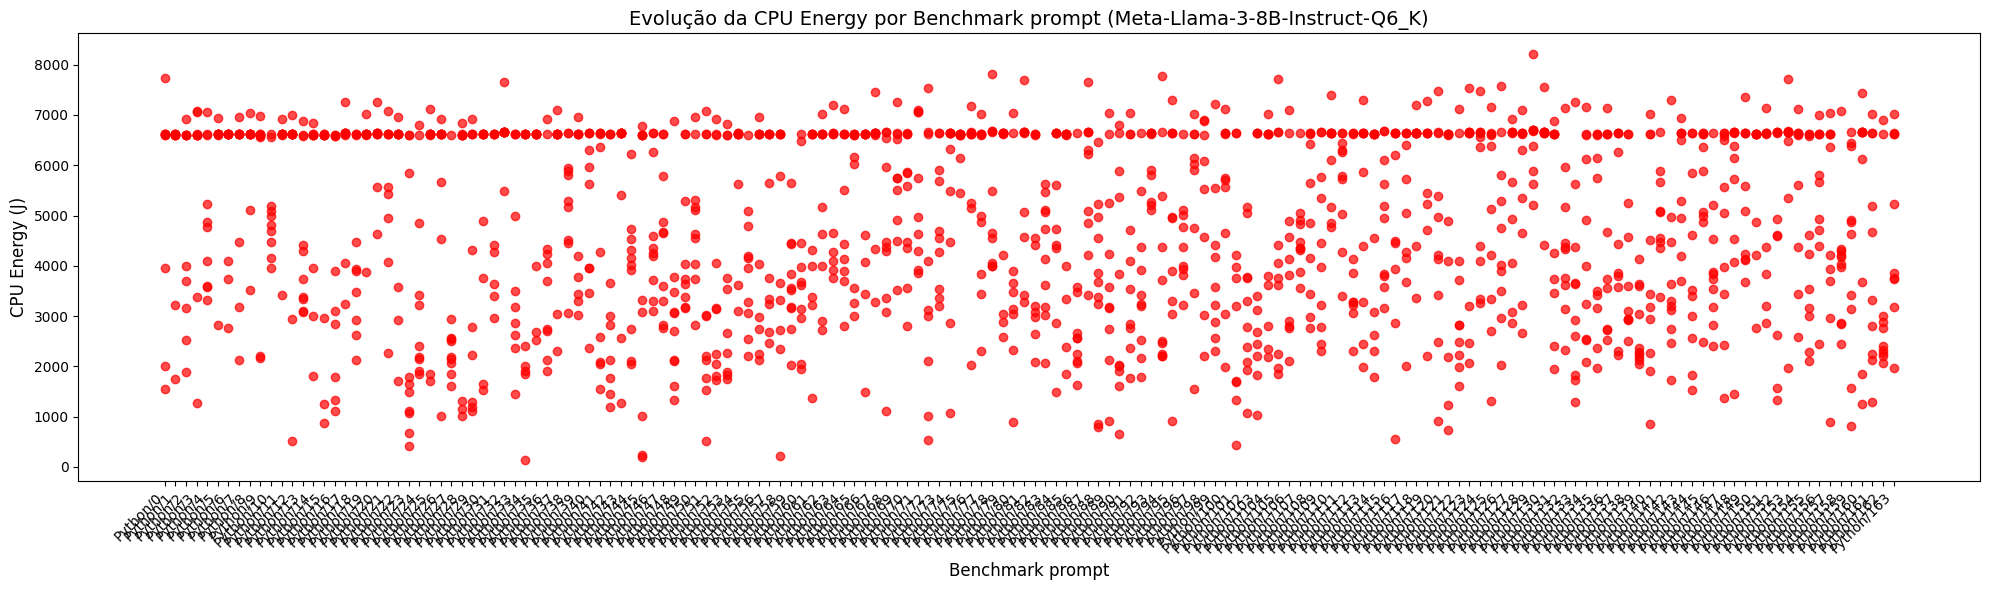

In [9]:
import matplotlib.pyplot as plt

df_0_shot_python = df_0_shot[df_0_shot["Programming Language"] == "Python"]

# Filtrar os dados para um LLM específico (substitua 'nome_do_LLM' pelo LLM que deseja filtrar)
llm_escolhido = 'Meta-Llama-3-8B-Instruct-Q6_K'
df_llm = df_0_shot_python[df_0_shot_python['LLM'] == llm_escolhido]

# Criar o scatterplot do Benchmark prompt vs CPU Energy para o LLM escolhido
plt.figure(figsize=(20, 6))
plt.scatter(df_llm['Benchmark prompt'], df_llm['CPU Energy (J)'], color='r', alpha=0.7)

# Adicionar títulos e rótulos
plt.title(f'Evolução da CPU Energy por Benchmark prompt ({llm_escolhido})', fontsize=14)
plt.xlabel('Benchmark prompt', fontsize=12)
plt.ylabel('CPU Energy (J)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()


### Remove outliers

In [10]:
# Function to remove outliers using the IQR method and return the number of removed outliers and original count
def remove_outliers_and_count(group):
    threshold = 0.5
    # Calculate IQR for 'CPU Energy (J)'
    Q1 = group['CPU Energy (J)'].quantile(0.25)
    Q3 = group['CPU Energy (J)'].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Filter the data to remove outliers
    filtered_group = group[(group['CPU Energy (J)'] >= lower_bound) & (group['CPU Energy (J)'] <= upper_bound)]
    
    # Calculate the number of outliers removed
    num_removed = len(group) - len(filtered_group)
    
    # Return the filtered group and the number of removed outliers, as well as the original count
    return filtered_group, num_removed, len(group)

# Initialize lists to store the number of outliers removed and original counts for each subset
outliers_list_0 = []
outliers_list_3 = []

# Remove outliers and count them for df_0_shot
df_0_no_outliers_list = []
for (llm, prompt), group in df_0_shot.groupby(['LLM', 'Benchmark prompt']):
    filtered_group, num_removed, original_count = remove_outliers_and_count(group)
    df_0_no_outliers_list.append(filtered_group)
    outliers_list_0.append([llm, prompt, num_removed, original_count])  # Store original count

df_0_no_outliers = pd.concat(df_0_no_outliers_list).reset_index(drop=True)

# Remove outliers and count them for df_3_shot
df_3_no_outliers_list = []
for (llm, prompt), group in df_3_shot.groupby(['LLM', 'Benchmark prompt']):
    filtered_group, num_removed, original_count = remove_outliers_and_count(group)
    df_3_no_outliers_list.append(filtered_group)
    outliers_list_3.append([llm, prompt, num_removed, original_count])  # Store original count

df_3_no_outliers = pd.concat(df_3_no_outliers_list).reset_index(drop=True)

In [11]:
# Create DataFrames to hold the outliers list with original counts
columns = ['LLM', 'Benchmark prompt', 'Outliers removed', 'Original count']
df_outliers_0 = pd.DataFrame(outliers_list_0, columns=columns)
df_outliers_3 = pd.DataFrame(outliers_list_3, columns=columns)

# Display the results
print("Outliers removed in df_0_shot:")
df_outliers_0

Outliers removed in df_0_shot:


,LLM,Benchmark prompt,Outliers removed,Original count
0,Meta-Llama-3-8B-Instruct-Q6_K,CPP/0,0,10
1,Meta-Llama-3-8B-Instruct-Q6_K,CPP/1,0,10
2,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,1,10
3,Meta-Llama-3-8B-Instruct-Q6_K,CPP/100,0,10
4,Meta-Llama-3-8B-Instruct-Q6_K,CPP/101,2,10
...,...,...,...,...
4095,starling-lm-7b-alpha.Q5_K_S,Python/95,4,9
4096,starling-lm-7b-alpha.Q5_K_S,Python/96,2,10
4097,starling-lm-7b-alpha.Q5_K_S,Python/97,4,10
4098,starling-lm-7b-alpha.Q5_K_S,Python/98,3,10


In [12]:
print("\nOutliers removed in df_3_shot:")
df_outliers_3


Outliers removed in df_3_shot:


,LLM,Benchmark prompt,Outliers removed,Original count
0,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,2,10
1,Meta-Llama-3-8B-Instruct-Q6_K,CPP/100,0,10
2,Meta-Llama-3-8B-Instruct-Q6_K,CPP/101,2,10
3,Meta-Llama-3-8B-Instruct-Q6_K,CPP/102,2,10
4,Meta-Llama-3-8B-Instruct-Q6_K,CPP/103,0,10
...,...,...,...,...
4020,starling-lm-7b-alpha.Q5_K_S,Python/95,1,10
4021,starling-lm-7b-alpha.Q5_K_S,Python/96,1,10
4022,starling-lm-7b-alpha.Q5_K_S,Python/97,2,10
4023,starling-lm-7b-alpha.Q5_K_S,Python/98,3,9


In [13]:
# Check how many prompt_id remains in each programming language after the outliers removal

print("----------------------- 0-shot -----------------------")
print(f"Java ->  {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Java']['Benchmark prompt'].nunique()}")
print(f"C++ -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'C++']['Benchmark prompt'].nunique()}")
print(f"JavaScript -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'JavaScript']['Benchmark prompt'].nunique()}")
print(f"Go -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Go']['Benchmark prompt'].nunique()}")
print(f"Python -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Python']['Benchmark prompt'].nunique()}")

print("----------------------- 3-shot -----------------------")
print(f"Java ->  {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Java']['Benchmark prompt'].nunique()}")
print(f"C++ -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'C++']['Benchmark prompt'].nunique()}")
print(f"JavaScript -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'JavaScript']['Benchmark prompt'].nunique()}")
print(f"Go -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Go']['Benchmark prompt'].nunique()}")
print(f"Python -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Python']['Benchmark prompt'].nunique()}")


----------------------- 0-shot -----------------------
Java ->  164
C++ -> 164
JavaScript -> 164
Go -> 164
Python -> 164
----------------------- 3-shot -----------------------
Java ->  161
C++ -> 161
JavaScript -> 161
Go -> 161
Python -> 161


### Statistical tests

In [14]:
df_0_no_outliers['Origin'] = '0-shot'
df_3_no_outliers['Origin'] = '3-shot'

df_combined_no_outliers = pd.concat([df_0_no_outliers, df_3_no_outliers], ignore_index=True)
df_combined_no_outliers.columns


Index(['LLM', 'Benchmark prompt', 'Execution time (s)', 'CPU Energy (J)',
       'RAM Energy (J)', 'GPU Energy (J)', 'CPU Power (W)', 'RAM Power (W)',
       'GPU Power (W)', 'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)',
       'Pass@1', 'Pass@10', 'GoogleBLEU', 'CodeBLEU', 'SacreBLEU',
       'Programming Language', 'Origin'],
      dtype='object')

#### By benchmark prompt

In [15]:
import pandas as pd
from scipy.stats import shapiro

# Inicializar listas para armazenar os resultados
results = []

# Iterar sobre os grupos de df_combined_no_outliers
for (llm, prompt, prompt_type), group in df_combined_no_outliers.groupby(['LLM', 'Benchmark prompt', 'Origin']):
    # Teste de Shapiro-Wilk para CPU Energy (J)
    stat_cpu, p_value_cpu = shapiro(group['CPU Energy (J)'])  # Teste de Shapiro-Wilk
    is_normal_cpu = 'Normal' if p_value_cpu > 0.05 else 'Not Normal'  # Verificar normalidade
    results.append([llm, prompt, 'CPU Energy', stat_cpu, p_value_cpu, is_normal_cpu, prompt_type])
    
    # Teste de Shapiro-Wilk para Execution Time (s)
    stat_exec, p_value_exec = shapiro(group['Execution time (s)'])  # Teste de Shapiro-Wilk
    is_normal_exec = 'Normal' if p_value_exec > 0.05 else 'Not Normal'  # Verificar normalidade
    results.append([llm, prompt, 'Execution Time', stat_exec, p_value_exec, is_normal_exec, prompt_type])

# Criar um DataFrame com os resultados
shapiro_results = pd.DataFrame(results, columns=[
    'LLM', 'Benchmark prompt', 'Metric', 'Statistic', 'p-value', 'Normality', 'Prompt Type'
])

# Exibir os resultados
shapiro_results


,LLM,Benchmark prompt,Metric,Statistic,p-value,Normality,Prompt Type
0,Meta-Llama-3-8B-Instruct-Q6_K,CPP/0,CPU Energy,0.867647,0.093839,Normal,0-shot
1,Meta-Llama-3-8B-Instruct-Q6_K,CPP/0,Execution Time,0.851785,0.060998,Normal,0-shot
2,Meta-Llama-3-8B-Instruct-Q6_K,CPP/1,CPU Energy,0.724957,0.001769,Not Normal,0-shot
3,Meta-Llama-3-8B-Instruct-Q6_K,CPP/1,Execution Time,0.723914,0.001718,Not Normal,0-shot
4,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,CPU Energy,0.941587,0.598706,Normal,0-shot
...,...,...,...,...,...,...,...
16245,starling-lm-7b-alpha.Q5_K_S,Python/98,Execution Time,0.931877,0.594672,Normal,3-shot
16246,starling-lm-7b-alpha.Q5_K_S,Python/99,CPU Energy,0.775558,0.015585,Not Normal,0-shot
16247,starling-lm-7b-alpha.Q5_K_S,Python/99,Execution Time,0.723563,0.004148,Not Normal,0-shot
16248,starling-lm-7b-alpha.Q5_K_S,Python/99,CPU Energy,0.824682,0.038914,Not Normal,3-shot


In [16]:
shapiro_results.groupby(['LLM', "Benchmark prompt", "Metric", 'Prompt Type', 'Normality']).size().unstack(fill_value=0)

Normality                                                                  Normal  \
LLM                           Benchmark prompt Metric         Prompt Type           
Meta-Llama-3-8B-Instruct-Q6_K CPP/0            CPU Energy     0-shot            1   
                                               Execution Time 0-shot            1   
                              CPP/1            CPU Energy     0-shot            0   
                                               Execution Time 0-shot            0   
                              CPP/10           CPU Energy     0-shot            1   
...                                                                           ...   
starling-lm-7b-alpha.Q5_K_S   Python/98        Execution Time 3-shot            1   
                              Python/99        CPU Energy     0-shot            0   
                                                              3-shot            0   
                                               Execution Time 0-shot            0   
                                                              3-shot            0   

Normality                                                                  Not Normal  
LLM                           Benchmark prompt Metric         Prompt Type              
Meta-Llama-3-8B-Instruct-Q6_K CPP/0            CPU Energy     0-shot                0  
                                               Execution Time 0-shot                0  
                              CPP/1            CPU Energy     0-shot                1  
                                               Execution Time 0-shot                1  
                              CPP/10           CPU Energy     0-shot                0  
...                                                                               ...  
starling-lm-7b-alpha.Q5_K_S   Python/98        Execution Time 3-shot                0  
                              Python/99        CPU Energy     0-shot                1  
                                                              3-shot                1  
                                               Execution Time 0-shot                1  
                                                              3-shot                1  

[16250 rows x 2 columns]

In [17]:
import pandas as pd
from scipy.stats import shapiro, ttest_ind, wilcoxon

# Inicializar listas para armazenar os resultados
t_test_results = []

# Definir o nível de significância
alpha = 0.05

# Iterar sobre os grupos de df_combined_no_outliers
for (llm, prompt), group in df_combined_no_outliers.groupby(['LLM', 'Benchmark prompt']):
    # Separar as amostras de 0-shot e 3-shot para CPU Energy
    group_0_cpu = group[group['Origin'] == '0-shot']['CPU Energy (J)']
    group_3_cpu = group[group['Origin'] == '3-shot']['CPU Energy (J)']

    # Separar as amostras de 0-shot e 3-shot para Execution Time
    group_0_exec = group[group['Origin'] == '0-shot']['Execution time (s)']
    group_3_exec = group[group['Origin'] == '3-shot']['Execution time (s)']

    # Verificar se ambas as amostras têm pelo menos 3 elementos para CPU Energy
    if len(group_0_cpu) < 3 or len(group_3_cpu) < 3:
        continue  # Pular se qualquer grupo tiver menos de 3 amostras

    # Teste de normalidade para 0-shot CPU Energy
    stat_0_cpu, p_value_0_cpu = shapiro(group_0_cpu)
    is_normal_0_cpu = p_value_0_cpu > 0.05

    # Teste de normalidade para 3-shot CPU Energy
    stat_3_cpu, p_value_3_cpu = shapiro(group_3_cpu)
    is_normal_3_cpu = p_value_3_cpu > 0.05

    # Aplicar os testes apropriados para CPU Energy
    if is_normal_0_cpu and is_normal_3_cpu:
        # Ambos são normais, usar t-test
        stat, p_value = ttest_ind(group_0_cpu, group_3_cpu)
        test_type = 't-test'
    else:
        # Pelo menos um não é normal, usar Wilcoxon
        if len(group_0_cpu) == len(group_3_cpu):
            stat, p_value = wilcoxon(group_0_cpu, group_3_cpu)
            test_type = 'Wilcoxon'
        else:
            continue

    # Verificar se é estatisticamente significativo para CPU Energy
    is_significant = 'Significant' if p_value < alpha else 'Not Significant'
    t_test_results.append([llm, prompt, test_type, stat, p_value, is_significant, 'CPU Energy', '0-shot'])
    t_test_results.append([llm, prompt, test_type, stat, p_value, is_significant, 'CPU Energy', '3-shot'])

    # Verificar se ambas as amostras têm pelo menos 3 elementos para Execution Time
    if len(group_0_exec) < 3 or len(group_3_exec) < 3:
        continue  # Pular se qualquer grupo tiver menos de 3 amostras

    # Teste de normalidade para 0-shot Execution Time
    stat_0_exec, p_value_0_exec = shapiro(group_0_exec)
    is_normal_0_exec = p_value_0_exec > 0.05

    # Teste de normalidade para 3-shot Execution Time
    stat_3_exec, p_value_3_exec = shapiro(group_3_exec)
    is_normal_3_exec = p_value_3_exec > 0.05

    # Aplicar os testes apropriados para Execution Time
    if is_normal_0_exec and is_normal_3_exec:
        # Ambos são normais, usar t-test
        stat, p_value = ttest_ind(group_0_exec, group_3_exec)
        test_type = 't-test'
    else:
        # Pelo menos um não é normal, usar Wilcoxon
        if len(group_0_exec) == len(group_3_exec):
            stat, p_value = wilcoxon(group_0_exec, group_3_exec)
            test_type = 'Wilcoxon'
        else:
            continue

    # Verificar se é estatisticamente significativo para Execution Time
    is_significant = 'Significant' if p_value < alpha else 'Not Significant'
    t_test_results.append([llm, prompt, test_type, stat, p_value, is_significant, 'Execution Time', '0-shot'])
    t_test_results.append([llm, prompt, test_type, stat, p_value, is_significant, 'Execution Time', '3-shot'])

# Criar um DataFrame com os resultados
test_results_df = pd.DataFrame(t_test_results, columns=['LLM', 'Benchmark prompt', 'Test Type', 'Statistic', 'p-value', 'Significance', 'Metric', 'Origin'])

# Exibir os resultados
test_results_df


,LLM,Benchmark prompt,Test Type,Statistic,p-value,Significance,Metric,Origin
0,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,t-test,15.265934,1.514371e-10,Significant,CPU Energy,0-shot
1,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,t-test,15.265934,1.514371e-10,Significant,CPU Energy,3-shot
2,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,t-test,15.336661,1.418496e-10,Significant,Execution Time,0-shot
3,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,t-test,15.336661,1.418496e-10,Significant,Execution Time,3-shot
4,Meta-Llama-3-8B-Instruct-Q6_K,CPP/100,Wilcoxon,20.000000,4.921875e-01,Not Significant,CPU Energy,0-shot
...,...,...,...,...,...,...,...,...
8213,starling-lm-7b-alpha.Q5_K_S,Python/97,t-test,7124.110827,3.941222e-41,Significant,CPU Energy,3-shot
8214,starling-lm-7b-alpha.Q5_K_S,Python/98,t-test,403.714124,2.704484e-24,Significant,CPU Energy,0-shot
8215,starling-lm-7b-alpha.Q5_K_S,Python/98,t-test,403.714124,2.704484e-24,Significant,CPU Energy,3-shot
8216,starling-lm-7b-alpha.Q5_K_S,Python/98,t-test,383.593948,4.745616e-24,Significant,Execution Time,0-shot


In [18]:
test_results_df.groupby(['LLM', "Benchmark prompt", "Metric", 'Origin', 'Significance']).size().unstack(fill_value=0)

Significance                                                          Not Significant  \
LLM                           Benchmark prompt Metric         Origin                    
Meta-Llama-3-8B-Instruct-Q6_K CPP/10           CPU Energy     0-shot                0   
                                                              3-shot                0   
                                               Execution Time 0-shot                0   
                                                              3-shot                0   
                              CPP/100          CPU Energy     0-shot                1   
...                                                                               ...   
starling-lm-7b-alpha.Q5_K_S   Python/97        CPU Energy     3-shot                0   
                              Python/98        CPU Energy     0-shot                0   
                                                              3-shot                0   
                                               Execution Time 0-shot                0   
                                                              3-shot                0   

Significance                                                          Significant  
LLM                           Benchmark prompt Metric         Origin               
Meta-Llama-3-8B-Instruct-Q6_K CPP/10           CPU Energy     0-shot            1  
                                                              3-shot            1  
                                               Execution Time 0-shot            1  
                                                              3-shot            1  
                              CPP/100          CPU Energy     0-shot            0  
...                                                                           ...  
starling-lm-7b-alpha.Q5_K_S   Python/97        CPU Energy     3-shot            1  
                              Python/98        CPU Energy     0-shot            1  
                                                              3-shot            1  
                                               Execution Time 0-shot            1  
                                                              3-shot            1  

[8218 rows x 2 columns]

In [19]:
significance_count_per_llm = test_results_df.groupby(['LLM', "Origin", "Metric",'Significance']).size().unstack(fill_value=0)
significance_count_per_llm


Significance                                               Not Significant  \
LLM                                 Origin Metric                            
Meta-Llama-3-8B-Instruct-Q6_K       0-shot CPU Energy                   42   
                                           Execution Time               41   
                                    3-shot CPU Energy                   42   
                                           Execution Time               41   
codegeex4-all-9b-Q6_K_L             0-shot CPU Energy                  127   
                                           Execution Time              123   
                                    3-shot CPU Energy                  127   
                                           Execution Time              123   
codellama-7b-instruct.Q5_K_M        0-shot CPU Energy                  202   
                                           Execution Time              200   
                                    3-shot CPU Energy                  202   
                                           Execution Time              200   
deepseek-coder-6.7b-instruct.Q5_K_M 0-shot CPU Energy                    5   
                                           Execution Time                5   
                                    3-shot CPU Energy                    5   
                                           Execution Time                5   
starling-lm-7b-alpha.Q5_K_S         0-shot CPU Energy                    2   
                                           Execution Time                2   
                                    3-shot CPU Energy                    2   
                                           Execution Time                2   

Significance                                               Significant  
LLM                                 Origin Metric                       
Meta-Llama-3-8B-Instruct-Q6_K       0-shot CPU Energy              360  
                                           Execution Time          337  
                                    3-shot CPU Energy              360  
                                           Execution Time          337  
codegeex4-all-9b-Q6_K_L             0-shot CPU Energy              269  
                                           Execution Time          255  
                                    3-shot CPU Energy              269  
                                           Execution Time          255  
codellama-7b-instruct.Q5_K_M        0-shot CPU Energy              228  
                                           Execution Time          211  
                                    3-shot CPU Energy              228  
                                           Execution Time          211  
deepseek-coder-6.7b-instruct.Q5_K_M 0-shot CPU Energy              358  
                                           Execution Time          314  
                                    3-shot CPU Energy              358  
                                           Execution Time          314  
starling-lm-7b-alpha.Q5_K_S         0-shot CPU Energy              543  
                                           Execution Time          485  
                                    3-shot CPU Energy              543  
                                           Execution Time          485

#### By programming language

In [20]:
import pandas as pd
from scipy.stats import shapiro

# Inicializar listas para armazenar os resultados
results = []

# Iterar sobre os grupos de df_combined_no_outliers
for (llm, prompt, origin), group in df_combined_no_outliers.groupby(['LLM', 'Programming Language', 'Origin']):
    # Teste de Shapiro-Wilk para CPU Energy
    stat_energy, p_value_energy = shapiro(group['CPU Energy (J)'])  # Teste de Shapiro-Wilk
    is_normal_energy = 'Normal' if p_value_energy > 0.05 else 'Not Normal'  # Verificar normalidade

    # Teste de Shapiro-Wilk para Execution Time
    stat_time, p_value_time = shapiro(group['Execution time (s)'])  # Teste de Shapiro-Wilk
    is_normal_time = 'Normal' if p_value_time > 0.05 else 'Not Normal'  # Verificar normalidade

    # Armazenar os resultados para CPU Energy
    results.append([llm, prompt, stat_energy, p_value_energy, is_normal_energy, origin, 'CPU Energy'])
    # Armazenar os resultados para Execution Time
    results.append([llm, prompt, stat_time, p_value_time, is_normal_time, origin, 'Execution Time'])

# Criar um DataFrame com os resultados
shapiro_results = pd.DataFrame(results, columns=['LLM', 'Programming Language', 'Statistic', 'p-value', 'Normality', 'Origin', 'Measurement Type'])

# Exibir os resultados
shapiro_results


,LLM,Programming Language,Statistic,p-value,Normality,Origin,Measurement Type
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.819766,7.076173e-38,Not Normal,0-shot,CPU Energy
1,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.817739,4.922493e-38,Not Normal,0-shot,Execution Time
2,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.757220,3.322479e-41,Not Normal,3-shot,CPU Energy
3,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.755740,2.705347e-41,Not Normal,3-shot,Execution Time
4,Meta-Llama-3-8B-Instruct-Q6_K,Go,0.956816,5.260587e-19,Not Normal,0-shot,CPU Energy
...,...,...,...,...,...,...,...
95,starling-lm-7b-alpha.Q5_K_S,JavaScript,0.798225,3.103961e-37,Not Normal,3-shot,Execution Time
96,starling-lm-7b-alpha.Q5_K_S,Python,0.187052,0.000000e+00,Not Normal,0-shot,CPU Energy
97,starling-lm-7b-alpha.Q5_K_S,Python,0.181411,0.000000e+00,Not Normal,0-shot,Execution Time
98,starling-lm-7b-alpha.Q5_K_S,Python,0.715245,3.890005e-42,Not Normal,3-shot,CPU Energy


In [21]:
import pandas as pd
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Inicializar listas para armazenar os resultados
t_test_results = []

# Definir o nível de significância
alpha = 0.05

# Iterar sobre os grupos de df_combined_no_outliers
for (llm, programming_language), group in df_combined_no_outliers.groupby(['LLM', 'Programming Language']):
    # Separar as amostras de 0-shot e 3-shot para CPU Energy
    group_0_energy = group[group['Origin'] == '0-shot']['CPU Energy (J)']
    group_3_energy = group[group['Origin'] == '3-shot']['CPU Energy (J)']
    
    # Separar as amostras de 0-shot e 3-shot para Execution Time
    group_0_time = group[group['Origin'] == '0-shot']['Execution time (s)']
    group_3_time = group[group['Origin'] == '3-shot']['Execution time (s)']
    
    # Teste para CPU Energy
    if len(group_0_energy) < 1 or len(group_3_energy) < 1:
        continue  # Pular se qualquer grupo não tiver amostras

    # Teste de normalidade para CPU Energy
    is_normal_0_energy = shapiro(group_0_energy)[1] > 0.05
    is_normal_3_energy = shapiro(group_3_energy)[1] > 0.05

    # Aplicar os testes apropriados para CPU Energy
    if is_normal_0_energy and is_normal_3_energy:
        # Ambos são normais, usar t-test
        stat_energy, p_value_energy = ttest_ind(group_0_energy, group_3_energy, equal_var=False)
        test_type_energy = 't-test'
    else:
        # Pelo menos um não é normal, usar Mann-Whitney U test
        stat_energy, p_value_energy = mannwhitneyu(group_0_energy, group_3_energy)
        test_type_energy = 'Mann-Whitney U'

    # Verificar se é estatisticamente significativo para CPU Energy
    is_significant_energy = 'Significant' if p_value_energy < alpha else 'Not Significant'

    # Armazenar os resultados de CPU Energy
    t_test_results.append([llm, programming_language, 'CPU Energy', test_type_energy, stat_energy, p_value_energy, is_significant_energy, '0-shot'])
    t_test_results.append([llm, programming_language, 'CPU Energy', test_type_energy, stat_energy, p_value_energy, is_significant_energy, '3-shot'])

    # Teste para Execution Time
    if len(group_0_time) < 1 or len(group_3_time) < 1:
        continue  # Pular se qualquer grupo não tiver amostras

    # Teste de normalidade para Execution Time
    is_normal_0_time = shapiro(group_0_time)[1] > 0.05
    is_normal_3_time = shapiro(group_3_time)[1] > 0.05

    # Aplicar os testes apropriados para Execution Time
    if is_normal_0_time and is_normal_3_time:
        # Ambos são normais, usar t-test
        stat_time, p_value_time = ttest_ind(group_0_time, group_3_time, equal_var=False)
        test_type_time = 't-test'
    else:
        # Pelo menos um não é normal, usar Mann-Whitney U test
        stat_time, p_value_time = mannwhitneyu(group_0_time, group_3_time)
        test_type_time = 'Mann-Whitney U'

    # Verificar se é estatisticamente significativo para Execution Time
    is_significant_time = 'Significant' if p_value_time < alpha else 'Not Significant'

    # Armazenar os resultados de Execution Time
    t_test_results.append([llm, programming_language, 'Execution Time', test_type_time, stat_time, p_value_time, is_significant_time, '0-shot'])
    t_test_results.append([llm, programming_language, 'Execution Time', test_type_time, stat_time, p_value_time, is_significant_time, '3-shot'])

# Criar um DataFrame com os resultados
test_results_df = pd.DataFrame(t_test_results, columns=['LLM', 'Programming Language', 'Measurement Type', 'Test Type', 'Statistic', 'p-value', 'Significance', 'Origin'])

# Exibir os resultados
test_results_df

,LLM,Programming Language,Measurement Type,Test Type,Statistic,p-value,Significance,Origin
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,CPU Energy,Mann-Whitney U,1539357.0,5.531268e-112,Significant,0-shot
1,Meta-Llama-3-8B-Instruct-Q6_K,C++,CPU Energy,Mann-Whitney U,1539357.0,5.531268e-112,Significant,3-shot
2,Meta-Llama-3-8B-Instruct-Q6_K,C++,Execution Time,Mann-Whitney U,1540197.0,2.367797e-112,Significant,0-shot
3,Meta-Llama-3-8B-Instruct-Q6_K,C++,Execution Time,Mann-Whitney U,1540197.0,2.367797e-112,Significant,3-shot
4,Meta-Llama-3-8B-Instruct-Q6_K,Go,CPU Energy,Mann-Whitney U,1554442.0,0.000000e+00,Significant,0-shot
...,...,...,...,...,...,...,...,...
95,starling-lm-7b-alpha.Q5_K_S,JavaScript,Execution Time,Mann-Whitney U,1510059.0,0.000000e+00,Significant,3-shot
96,starling-lm-7b-alpha.Q5_K_S,Python,CPU Energy,Mann-Whitney U,1507582.0,0.000000e+00,Significant,0-shot
97,starling-lm-7b-alpha.Q5_K_S,Python,CPU Energy,Mann-Whitney U,1507582.0,0.000000e+00,Significant,3-shot
98,starling-lm-7b-alpha.Q5_K_S,Python,Execution Time,Mann-Whitney U,1507552.0,0.000000e+00,Significant,0-shot


In [22]:
test_results_df_stat = test_results_df.groupby(
    ['LLM', 'Programming Language', 'Origin', 'Measurement Type', 'Significance']
).size().unstack(fill_value=0)
test_results_df_stat

Significance                                                                Significant
LLM                           Programming Language Origin Measurement Type             
Meta-Llama-3-8B-Instruct-Q6_K C++                  0-shot CPU Energy                  1
                                                          Execution Time              1
                                                   3-shot CPU Energy                  1
                                                          Execution Time              1
                              Go                   0-shot CPU Energy                  1
...                                                                                 ...
starling-lm-7b-alpha.Q5_K_S   JavaScript           3-shot Execution Time              1
                              Python               0-shot CPU Energy                  1
                                                          Execution Time              1
                                                   3-shot CPU Energy                  1
                                                          Execution Time              1

[100 rows x 1 columns]

##### Count significant samples by LLM

In [23]:
test_results_df_stat.loc["codegeex4-all-9b-Q6_K_L"]

Significance                                  Significant
Programming Language Origin Measurement Type             
C++                  0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Go                   0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Java                 0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
JavaScript           0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Python               0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1

In [24]:
test_results_df_stat.loc["codellama-7b-instruct.Q5_K_M"]

Significance                                  Significant
Programming Language Origin Measurement Type             
C++                  0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Go                   0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Java                 0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
JavaScript           0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Python               0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1

In [25]:
test_results_df_stat.loc["deepseek-coder-6.7b-instruct.Q5_K_M"]

Significance                                  Significant
Programming Language Origin Measurement Type             
C++                  0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Go                   0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Java                 0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
JavaScript           0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Python               0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1

In [26]:
test_results_df_stat.loc["Meta-Llama-3-8B-Instruct-Q6_K"]

Significance                                  Significant
Programming Language Origin Measurement Type             
C++                  0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Go                   0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Java                 0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
JavaScript           0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Python               0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1

In [27]:
test_results_df_stat.loc["starling-lm-7b-alpha.Q5_K_S"]

Significance                                  Significant
Programming Language Origin Measurement Type             
C++                  0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Go                   0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Java                 0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
JavaScript           0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1
Python               0-shot CPU Energy                  1
                            Execution Time              1
                     3-shot CPU Energy                  1
                            Execution Time              1

### Create dataframes with all the average values

In [28]:
# List of columns to calculate the mean for
columns_to_average = ['CPU Energy (J)', 'Execution time (s)', 'Pass@1', 'Pass@10', 'CodeBLEU', 'SacreBLEU', 'GoogleBLEU']

# Grouping by LLM and Programming Language, and calculating the mean for the specified columns
df_0_averages = df_0_no_outliers.groupby(['LLM', 'Programming Language'])[columns_to_average].mean().reset_index()
df_3_averages = df_3_no_outliers.groupby(['LLM', 'Programming Language'])[columns_to_average].mean().reset_index()

df_0_averages["SacreBLEU"] = df_0_averages["SacreBLEU"] / 100
df_3_averages["SacreBLEU"] = df_3_averages["SacreBLEU"] / 100

df_0_averages

,LLM,Programming Language,CPU Energy (J),Execution time (s),Pass@1,Pass@10,CodeBLEU,SacreBLEU,GoogleBLEU
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,4718.526185,72.401776,0.026220,0.195122,0.256971,0.115135,0.123414
1,Meta-Llama-3-8B-Instruct-Q6_K,Go,4701.058799,71.878023,0.007317,0.048780,0.315362,0.086511,0.098010
2,Meta-Llama-3-8B-Instruct-Q6_K,Java,3909.191751,59.955080,0.035976,0.170732,0.345221,0.133636,0.140678
3,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,3860.652437,59.149561,0.001220,0.012195,0.202326,0.071373,0.085230
4,Meta-Llama-3-8B-Instruct-Q6_K,Python,4982.757047,76.436640,0.479878,0.768293,0.286537,0.048214,0.056134
5,codegeex4-all-9b-Q6_K_L,C++,6229.088051,95.700138,0.010976,0.085366,0.221068,0.097517,0.105386
6,codegeex4-all-9b-Q6_K_L,Go,2548.661758,38.987941,0.000610,0.004653,0.325416,0.198654,0.205870
7,codegeex4-all-9b-Q6_K_L,Java,2593.555918,39.453178,0.000000,0.000000,0.340050,0.234309,0.242605
8,codegeex4-all-9b-Q6_K_L,JavaScript,1955.354792,29.893663,0.000610,0.006098,0.216770,0.186302,0.191231
9,codegeex4-all-9b-Q6_K_L,Python,2456.046411,37.519930,0.700610,0.914634,0.297576,0.119884,0.133790


### Plots

#### Compare CPU Energy for all LLMs (0-shot and 3-shot)

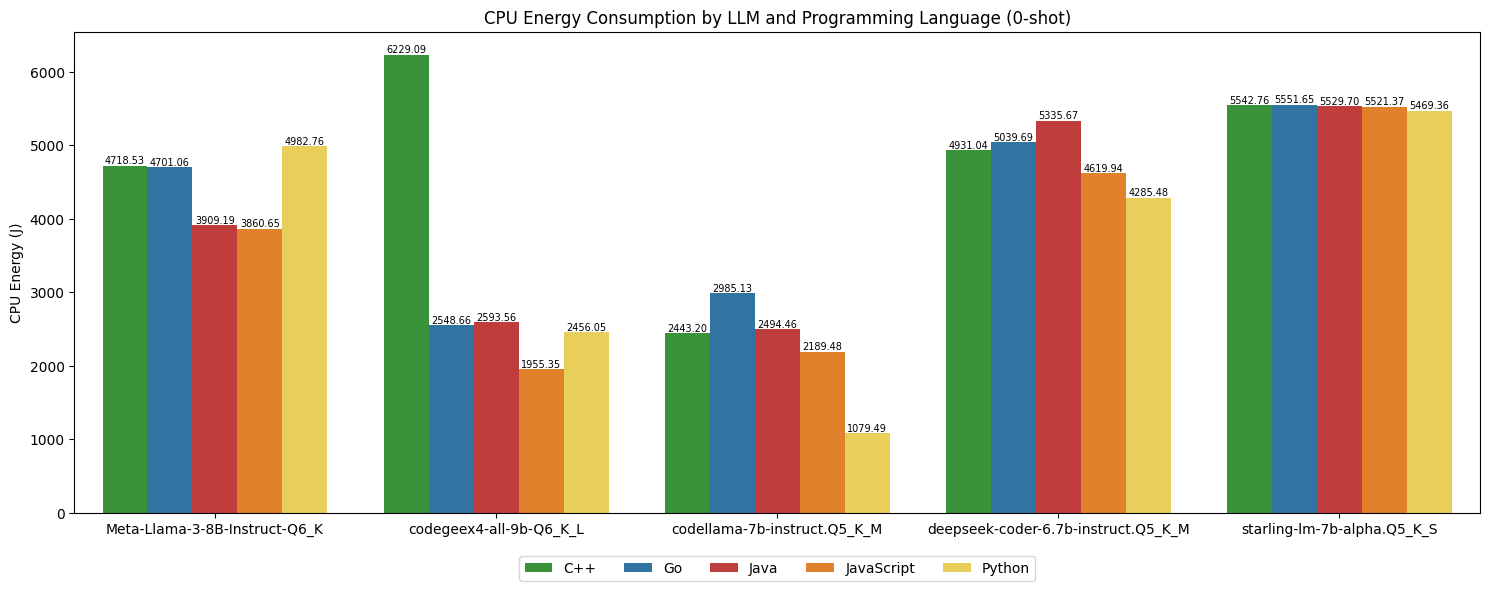

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, 
                       x='LLM', 
                       y='CPU Energy (J)', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
plt.title('CPU Energy Consumption by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('CPU Energy (J)')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=7)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


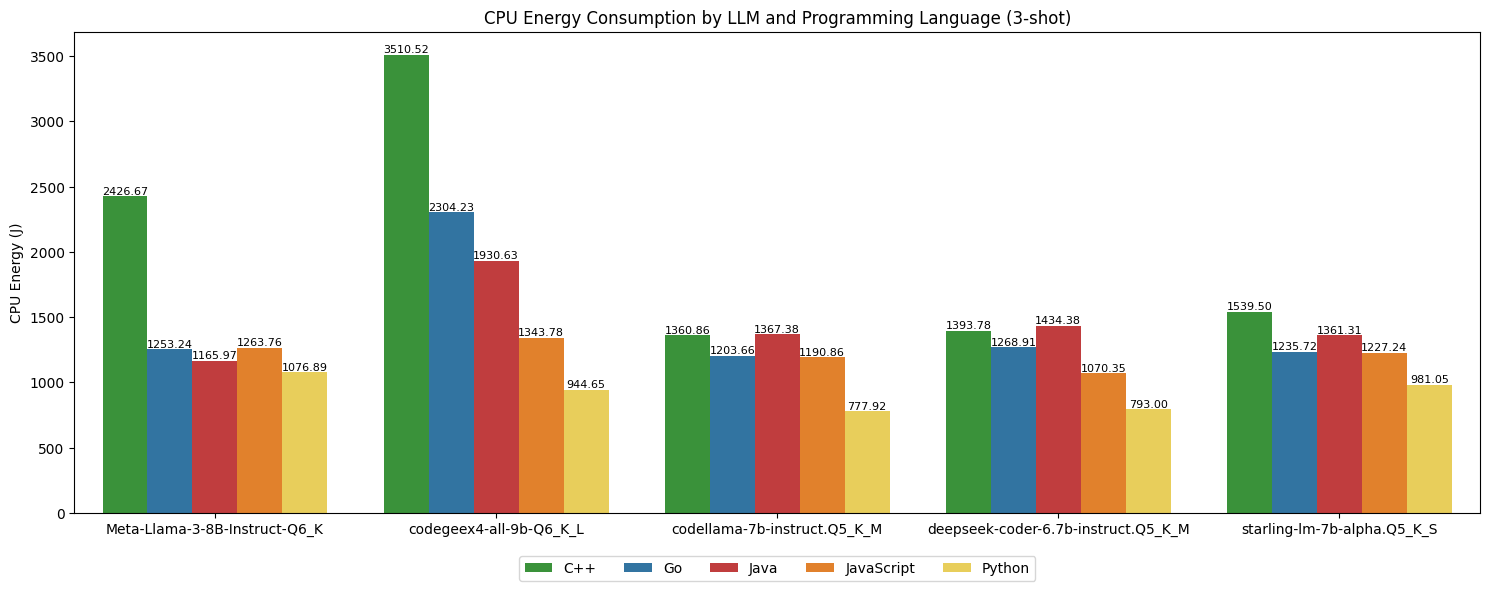

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_3_averages, 
                       x='LLM', 
                       y='CPU Energy (J)', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
plt.title('CPU Energy Consumption by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('CPU Energy (J)')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=8)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


#### Compare Execution time for all LLMs (0-shot and 3-shot)

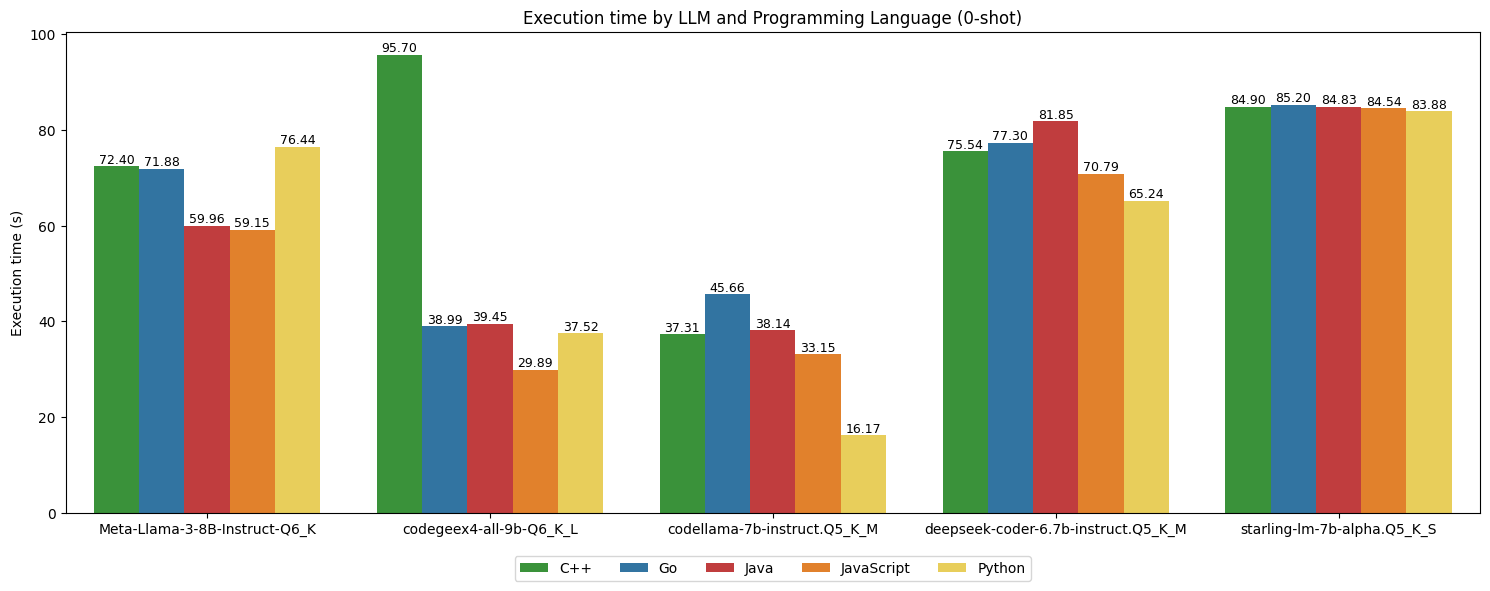

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir uma paleta de cores para as linguagens de programação
palette = {
    'Go': '#1f77b4',        # Azul
    'Python': '#ffdd44',    # Amarelo
    'Java': '#d62728',      # Vermelho
    'JavaScript': '#ff7f0e', # Laranja
    'C++': '#2ca02c'        # Verde
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Criar o barplot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, x='LLM', y='Execution time (s)', hue='Programming Language', palette=palette,
                      hue_order=programming_languages_order)

# Adicionar títulos e rótulos
plt.title('Execution time by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('Execution time (s)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Adicionar rótulos em cima de cada barra com tamanho de letra reduzido
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=9)  # Ajuste o valor de fontsize conforme necessário

# Mostrar o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

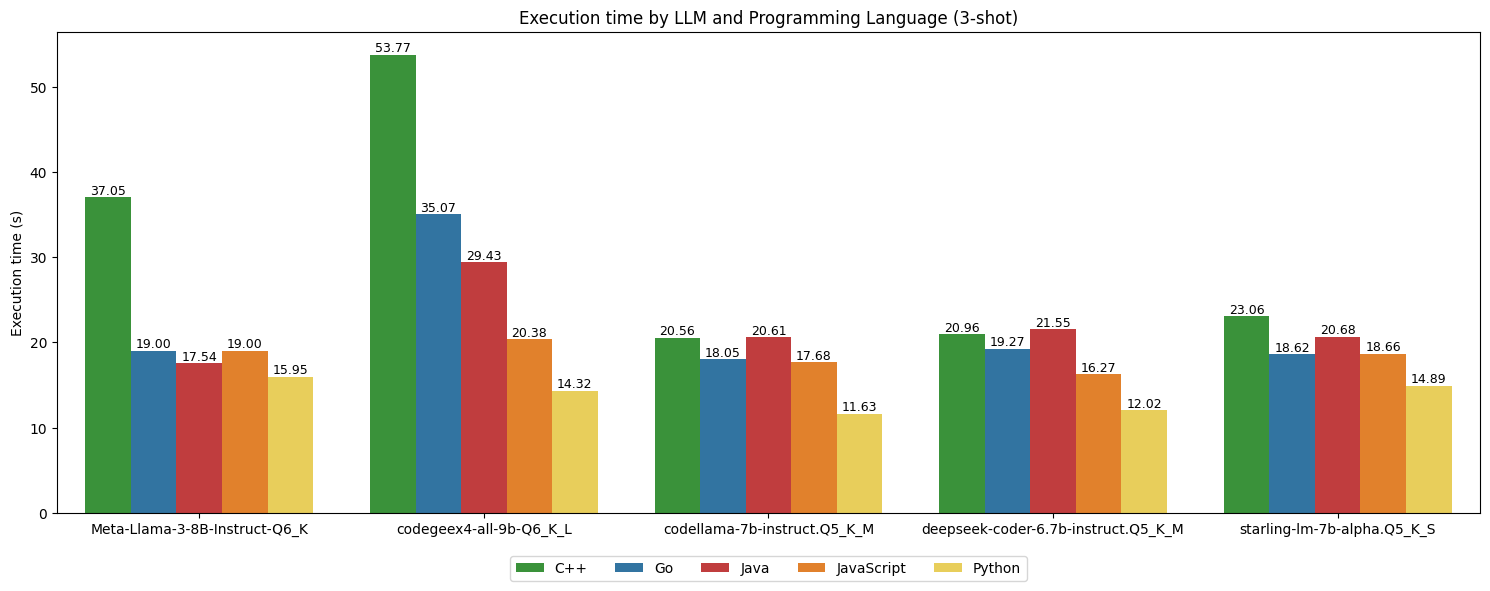

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir uma paleta de cores para as linguagens de programação
palette = {
    'Go': '#1f77b4',        # Azul
    'Python': '#ffdd44',    # Amarelo
    'Java': '#d62728',      # Vermelho
    'JavaScript': '#ff7f0e', # Laranja
    'C++': '#2ca02c'        # Verde
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Criar o barplot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_3_averages, x='LLM', y='Execution time (s)', hue='Programming Language', palette=palette,
                      hue_order=programming_languages_order)

# Adicionar títulos e rótulos
plt.title('Execution time by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('Execution time (s)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Adicionar rótulos em cima de cada barra com tamanho de letra reduzido
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=9)  # Ajuste o valor de fontsize conforme necessário

# Mostrar o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

#### Differences from 0-shot to 3-shot

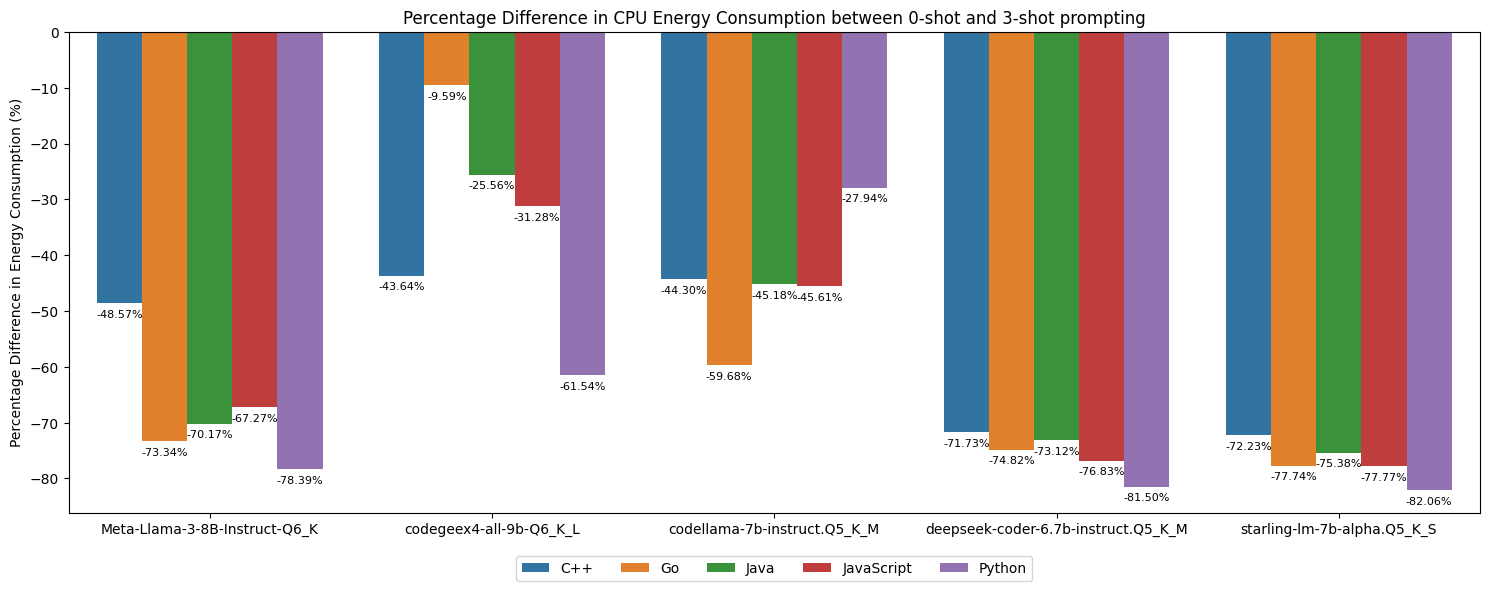

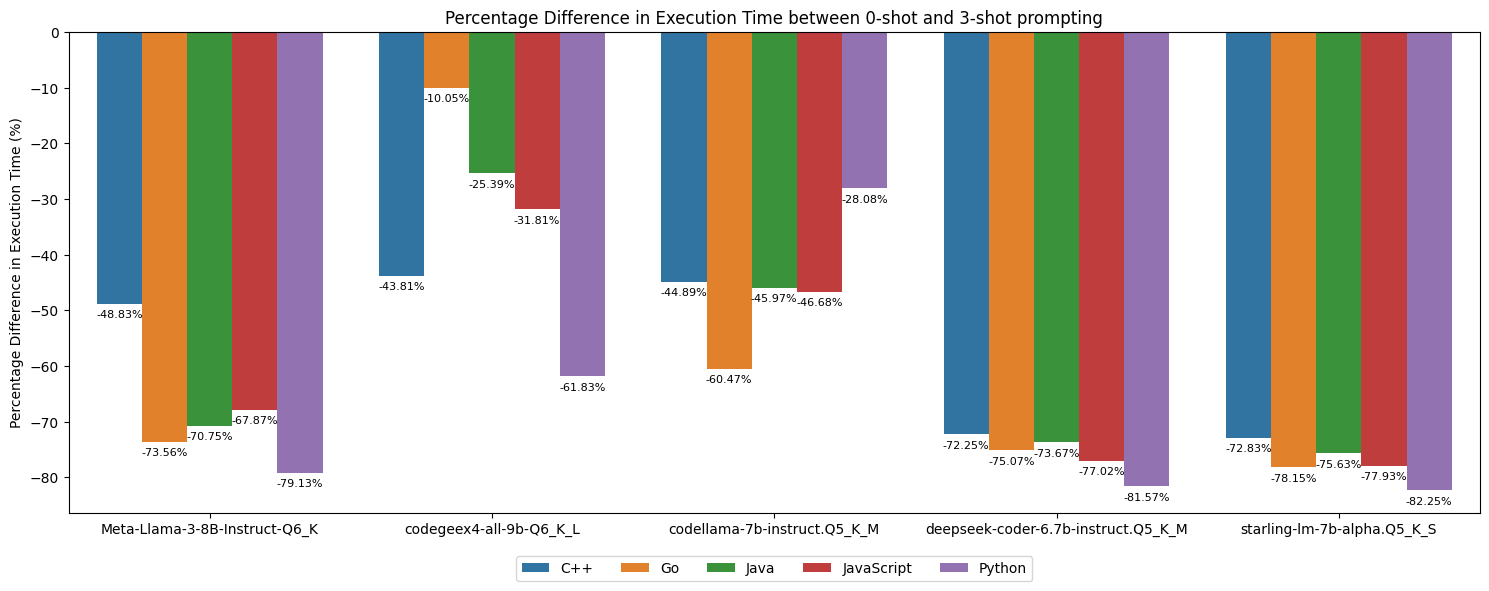

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the difference for CPU Energy and Execution Time
df_merged = pd.merge(df_0_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     df_3_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     on=['LLM', 'Programming Language'],
                     suffixes=('_0', '_3'))

# Calculate the percentage difference
df_merged['CPU Energy Percentage Difference (%)'] = ((df_merged['CPU Energy (J)_3'] - df_merged['CPU Energy (J)_0']) / df_merged['CPU Energy (J)_0']) * 100
df_merged['Execution Time Percentage Difference (%)'] = ((df_merged['Execution time (s)_3'] - df_merged['Execution time (s)_0']) / df_merged['Execution time (s)_0']) * 100

# Create bar plots for CPU Energy Percentage Difference
plt.figure(figsize=(15, 6))
barplot_energy = sns.barplot(data=df_merged, x='LLM', y='CPU Energy Percentage Difference (%)', hue='Programming Language')
plt.title('Percentage Difference in CPU Energy Consumption between 0-shot and 3-shot prompting')
plt.xlabel('')
plt.ylabel('Percentage Difference in Energy Consumption (%)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels on top of each bar, positioned lower
for p in barplot_energy.patches:
    barplot_energy.annotate(f'{p.get_height():.2f}%', 
                            (p.get_x() + p.get_width() / 2., p.get_height() - 2),  # Adjusting the position
                            ha='center', va='center', fontsize=8)

plt.grid(False)
plt.tight_layout()
plt.show()

# Create bar plots for Execution Time Percentage Difference
plt.figure(figsize=(15, 6))
barplot_time = sns.barplot(data=df_merged, x='LLM', y='Execution Time Percentage Difference (%)', hue='Programming Language')
plt.title('Percentage Difference in Execution Time between 0-shot and 3-shot prompting')
plt.xlabel('')
plt.ylabel('Percentage Difference in Execution Time (%)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels on top of each bar, positioned lower
for p in barplot_time.patches:
    barplot_time.annotate(f'{p.get_height():.2f}%', 
                          (p.get_x() + p.get_width() / 2., p.get_height() - 2),  # Adjusting the position
                          ha='center', va='center', fontsize=8)

plt.grid(False)
plt.tight_layout()
plt.show()


In [34]:
df_0_averages_mean = df_0_averages.groupby('LLM', as_index=False).mean()
df_3_averages_mean = df_3_averages.groupby('LLM', as_index=False).mean()

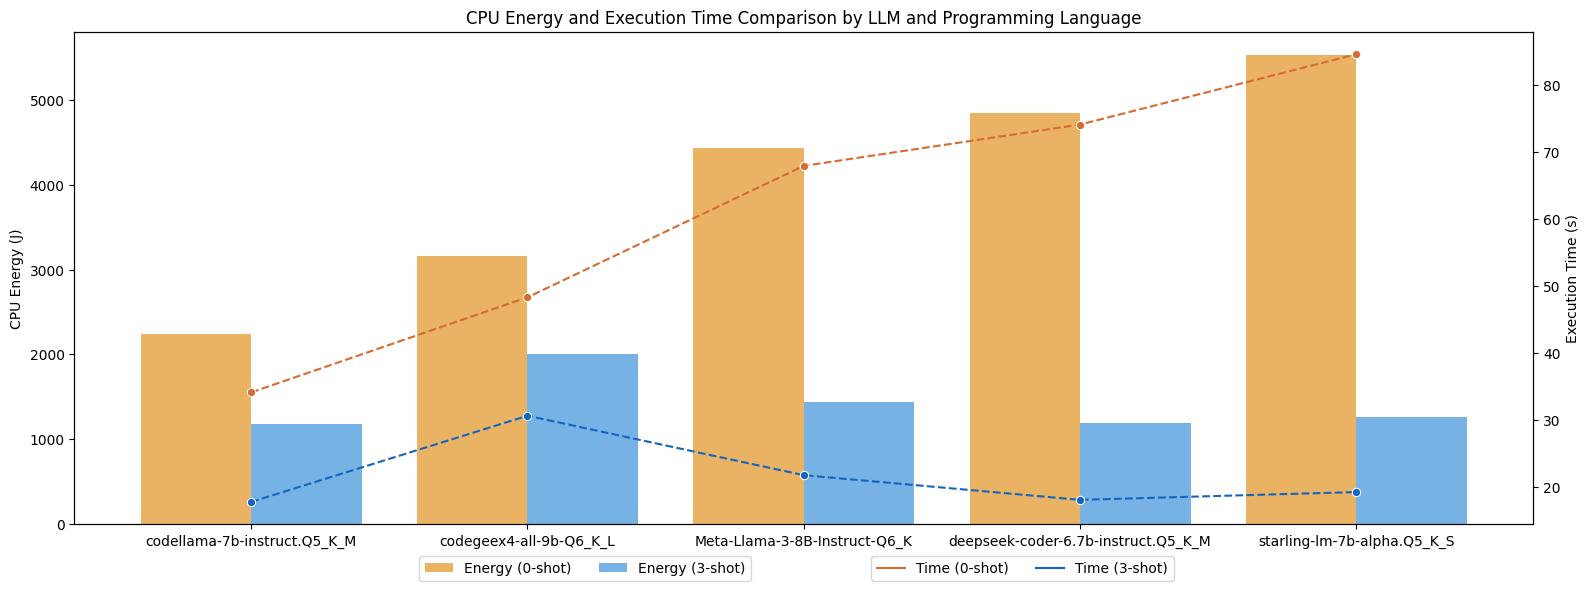

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_0_averages e df_3_averages já estão carregados

# Adicionar uma coluna para indicar o dataframe de origem
df_0_averages_mean['Source'] = '0-shot'
df_3_averages_mean['Source'] = '3-shot'

# Concatenar os DataFrames
merged_df = pd.concat([
    df_0_averages_mean[['LLM', 'CPU Energy (J)', 'Execution time (s)', 'Source']],
    df_3_averages_mean[['LLM', 'CPU Energy (J)', 'Execution time (s)', 'Source']]
], ignore_index=True)

# Calcular a média de Execution time (s) por LLM para ordenar
mean_execution_time = merged_df.groupby('LLM')['Execution time (s)'].mean()

# Ordenar os LLMs de acordo com o Execution time (s)
ordered_llms = mean_execution_time.sort_values().index

# Atualizar a ordem do eixo x de acordo com o tempo de execução
merged_df['LLM'] = pd.Categorical(merged_df['LLM'], categories=ordered_llms, ordered=True)

# Criar a figura e os eixos
fig, ax1 = plt.subplots(figsize=(16, 6))

# Definir cores claras para as barras
bar_colors = ['#FFB74D', '#64B5F6']  # Laranja claro para '0-shot' e azul claro para '3-shot'

# Criar as barras para CPU Energy com cores claras
barplot = sns.barplot(data=merged_df, x='LLM', y='CPU Energy (J)', hue='Source', ax=ax1, palette=bar_colors)

# Remover o grid do eixo ax1 (barras)
ax1.grid(False)

# Adicionar títulos e rótulos
plt.title('CPU Energy and Execution Time Comparison by LLM and Programming Language')
ax1.set_xlabel('')
ax1.set_ylabel('CPU Energy (J)')

# Criar o segundo eixo y para Execution Time
ax2 = ax1.twinx()

# Definir cores escuras para as linhas
line_colors = ['#D76B30', '#1565C0']  # Laranja escuro para '0-shot' e azul escuro para '3-shot'

# Criar o lineplot para Execution Time
sns.lineplot(data=merged_df, x='LLM', y='Execution time (s)', hue='Source',
             marker='o', ax=ax2, palette=line_colors, linestyle='--')

# Remover o grid do eixo ax2 (linhas)
ax2.grid(False)

# Adicionar rótulos e título ao eixo y da direita
ax2.set_ylabel('Execution Time (s)')

# Obter handles e labels das legendas
handles1, labels1 = ax1.get_legend_handles_labels()  # Para o barplot
handles2, labels2 = ax2.get_legend_handles_labels()  # Para o lineplot

# Combinar handles e labels
handles = handles1 + handles2
labels = ['Energy (0-shot)', 'Energy (3-shot)', 'Time (0-shot)', 'Time (3-shot)']

# Adicionar legendas com as mesmas posições do seu exemplo
ax1.legend(handles1, ['Energy (0-shot)', 'Energy (3-shot)'], bbox_to_anchor=(0.35, -0.05), loc='upper center', ncol=2)
ax2.legend(handles2, ['Time (0-shot)', 'Time (3-shot)'], bbox_to_anchor=(0.65, -0.05), loc='upper center', ncol=2)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


#### Compare pass@k and BLEU scores

##### For each Programming language

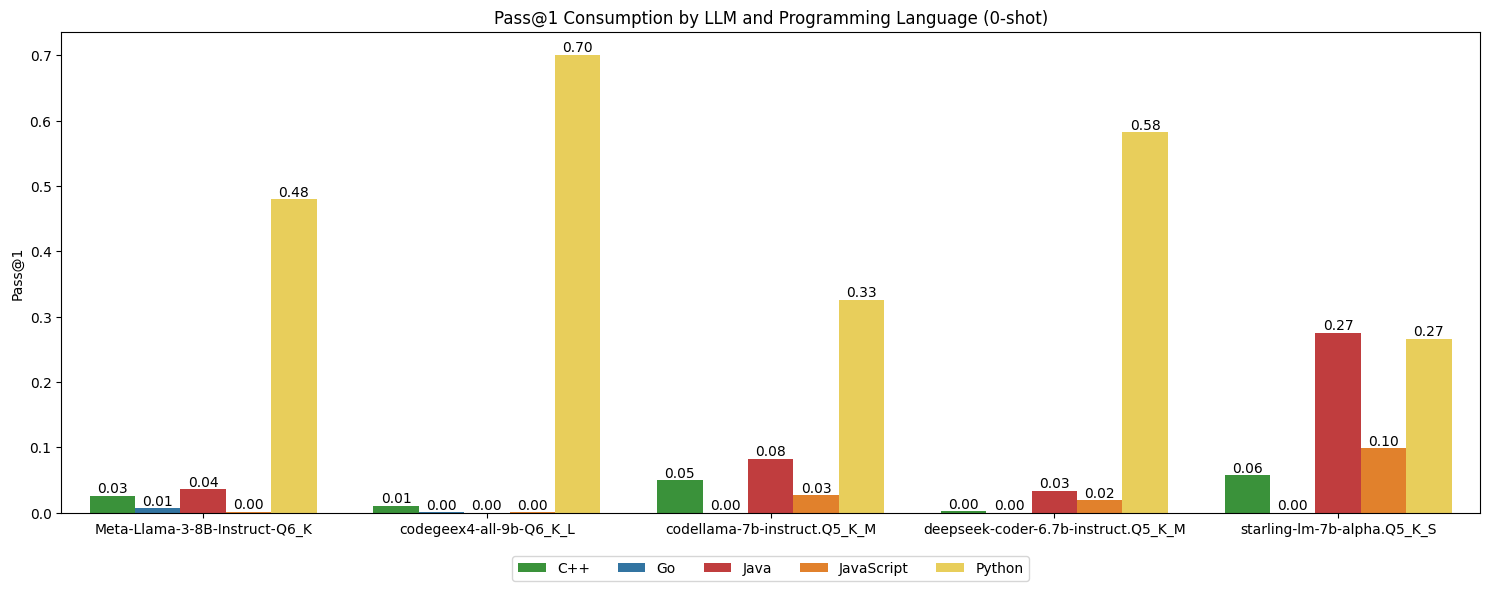

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, 
                       x='LLM', 
                       y='Pass@1', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
plt.title('Pass@1 Consumption by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('Pass@1')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


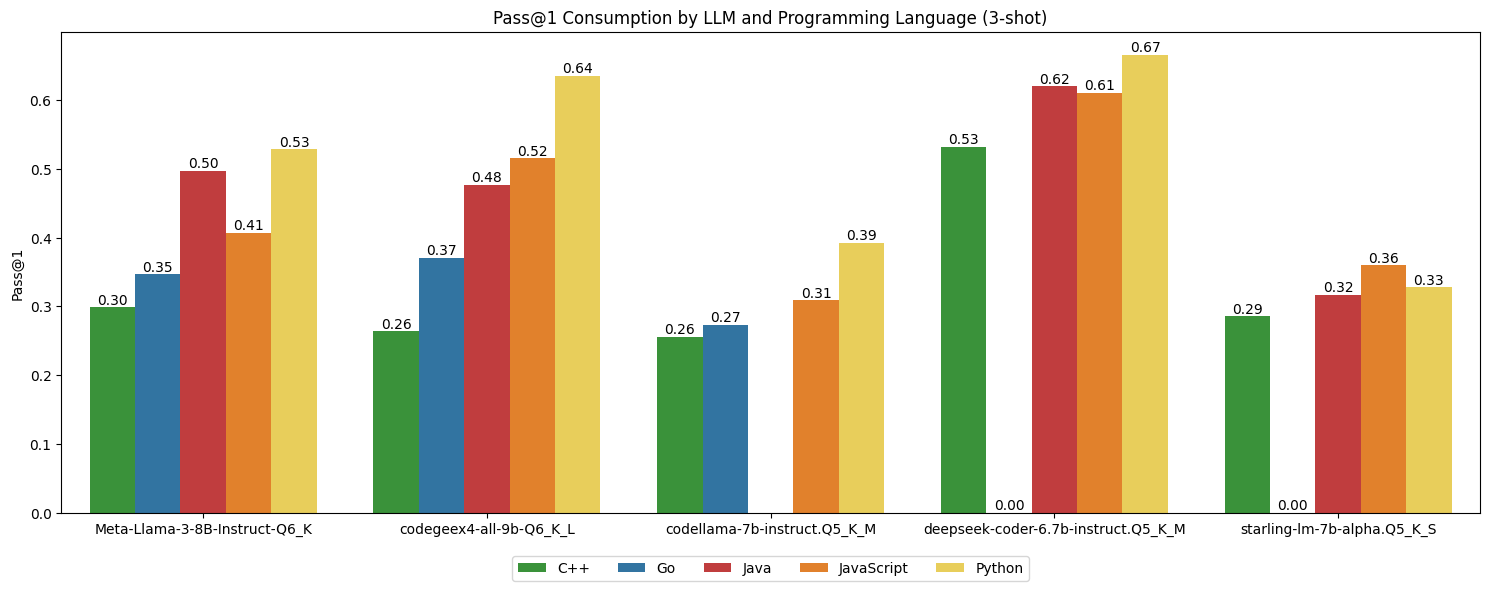

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_3_averages, 
                       x='LLM', 
                       y='Pass@1', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
plt.title('Pass@1 Consumption by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('Pass@1')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


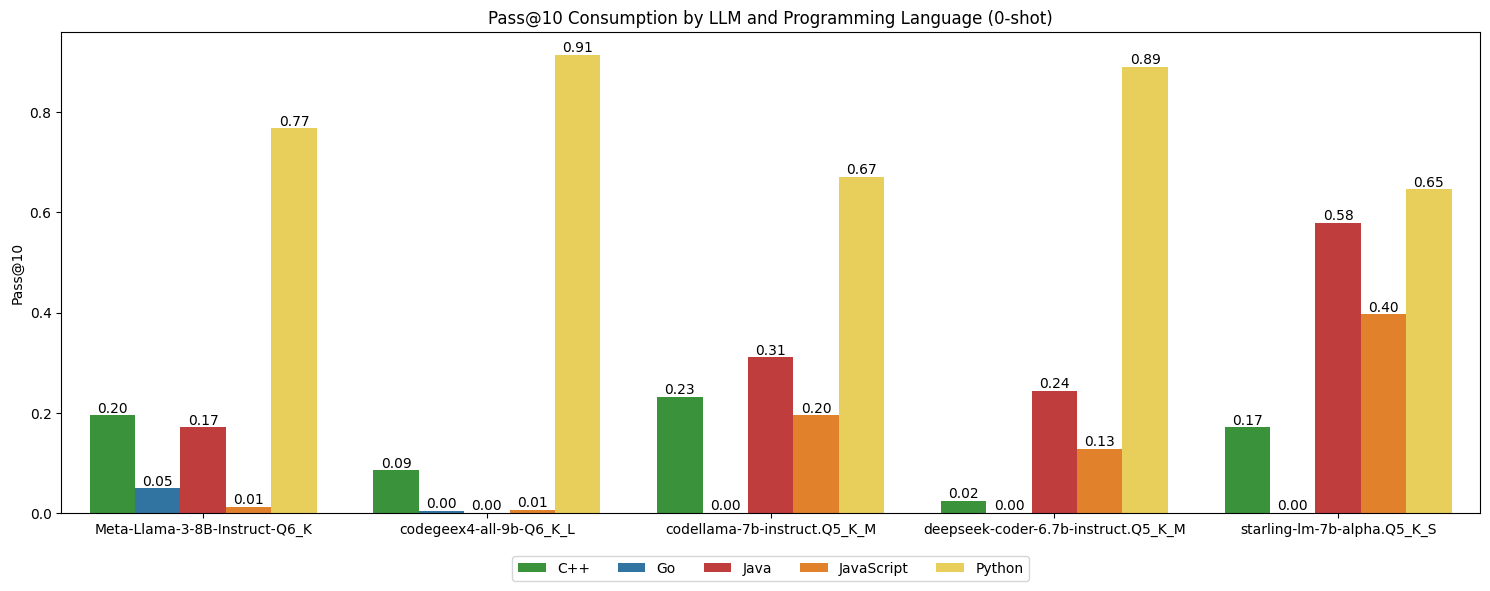

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, 
                       x='LLM', 
                       y='Pass@10', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
plt.title('Pass@10 Consumption by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('Pass@10')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


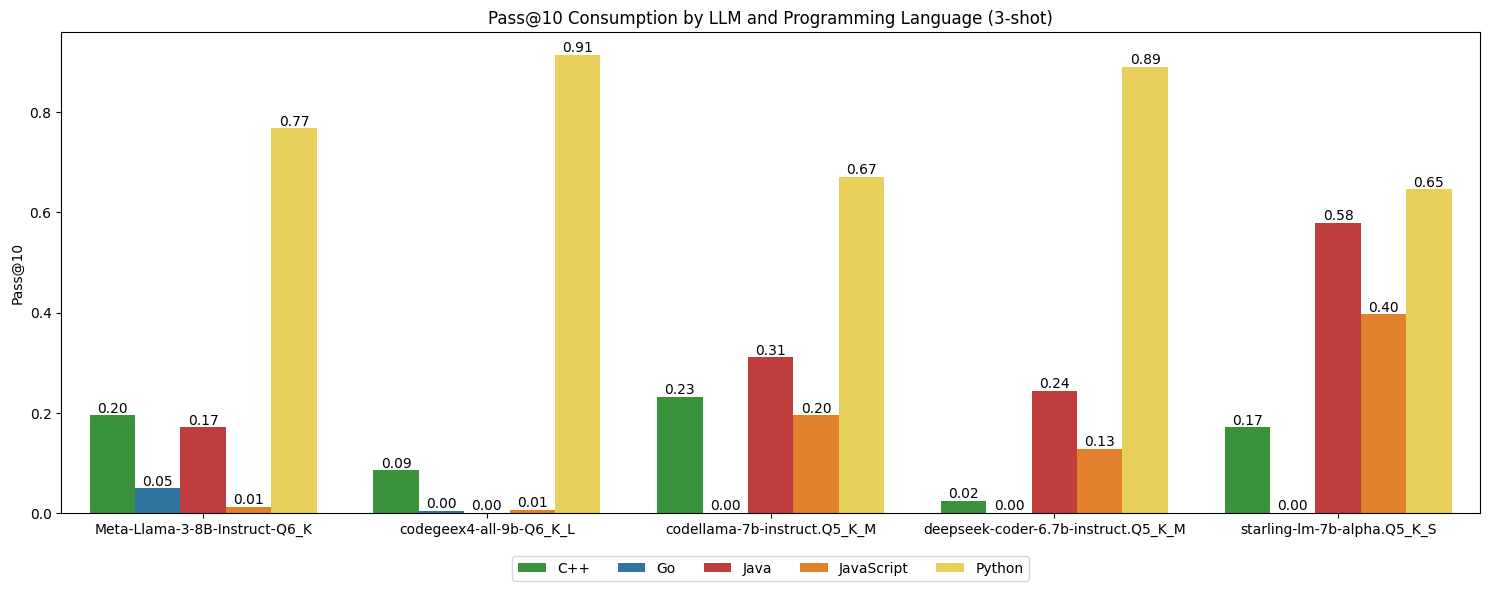

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, 
                       x='LLM', 
                       y='Pass@10', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
plt.title('Pass@10 Consumption by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('Pass@10')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


##### With mean values for each LLM

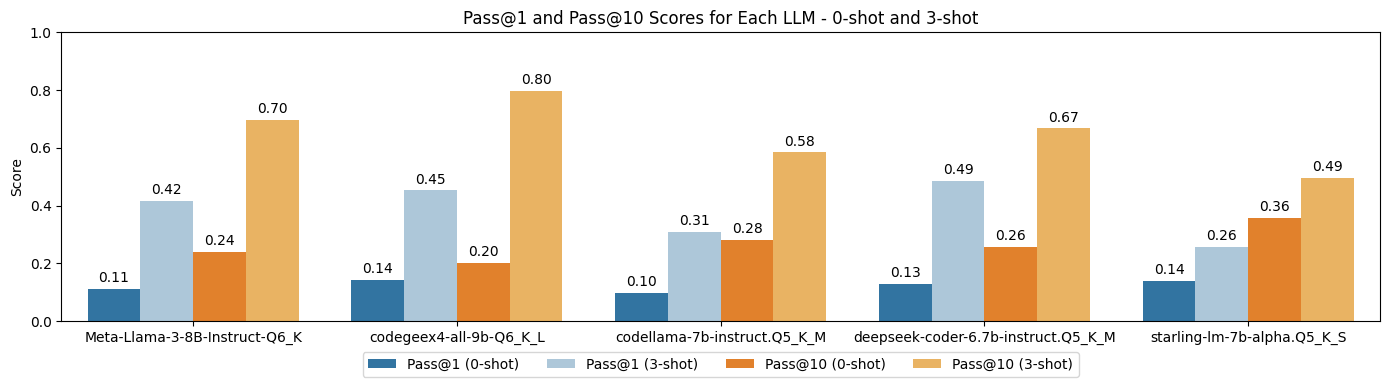

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrames to the appropriate format for Pass@1 and Pass@10
df_melted_0 = df_0_averages.melt(id_vars=['LLM'], value_vars=['Pass@1', 'Pass@10'], var_name='Metric', value_name='Score')
df_melted_3 = df_3_averages.melt(id_vars=['LLM'], value_vars=['Pass@1', 'Pass@10'], var_name='Metric', value_name='Score')

# Add a column to indicate the shot type
df_melted_0['Shot'] = '0-shot'
df_melted_3['Shot'] = '3-shot'

# Combine the melted DataFrames for barplot
df_combined = pd.concat([df_melted_0, df_melted_3], ignore_index=True)

# Create a new column for combined Metric and Shot for custom order
df_combined['Metric_Shot'] = df_combined['Metric'] + " (" + df_combined['Shot'] + ")"

# Define the desired order for bar plot
metric_order = [
    'Pass@1 (0-shot)', 'Pass@1 (3-shot)',
    'Pass@10 (0-shot)', 'Pass@10 (3-shot)'
]

# Create a custom order for the Metric_Shot column
df_combined['Metric_Shot'] = pd.Categorical(df_combined['Metric_Shot'], categories=metric_order, ordered=True)

# Define a custom palette with lighter shades for 3-shot metrics
palette = {
    'Pass@1 (0-shot)': '#1f77b4',  # Dark blue for 0-shot
    'Pass@1 (3-shot)': '#a6c8e0',  # Light blue for 3-shot
    'Pass@10 (0-shot)': '#ff7f0e',  # Dark orange for 0-shot
    'Pass@10 (3-shot)': '#ffb84d'   # Light orange for 3-shot
}

# Plot settings for barplot
plt.figure(figsize=(14, 4))
bar_plot = sns.barplot(data=df_combined, x='LLM', y='Score', hue='Metric_Shot', ci=None, palette=palette, dodge=True)

plt.title("Pass@1 and Pass@10 Scores for Each LLM - 0-shot and 3-shot")
plt.xlabel("")
plt.ylabel("Score")
plt.ylim(0, 1)

# Place the legend below the plot and centered
plt.legend(title=None, bbox_to_anchor=(0.5, -0.15), loc='center', ncol=4)

# Add labels to the bars and rotate them 90 degrees
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),  # Format the height to 2 decimal places
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of each bar
                      ha='center', va='baseline',  # Align the text at the center of the bar
                      fontsize=10, color='black',  # Set font size and color
                      xytext=(0, 5),  # Offset the text slightly above the bar
                      textcoords='offset points')  # Use offset points for positioning


plt.grid(False)
plt.tight_layout()
plt.show()


#### BLEU scores

##### Mean values for each LLM

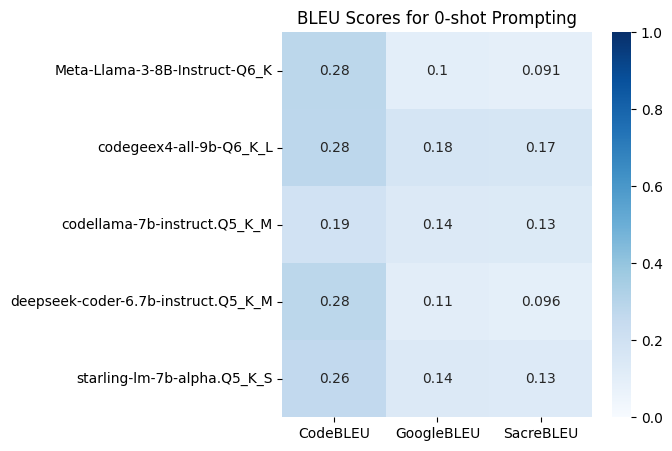

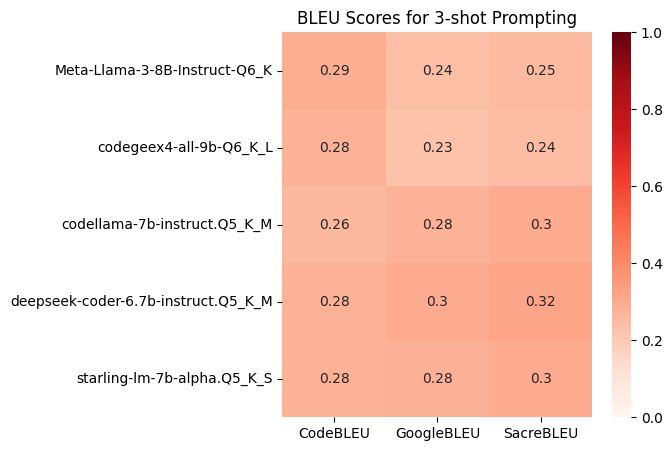

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrames for BLEU scores (CodeBLEU, SacreBLEU, GoogleBLEU) for heatmaps
df_bleu_melted_0 = df_0_averages.melt(id_vars=['LLM'], value_vars=['CodeBLEU', 'SacreBLEU', 'GoogleBLEU'], var_name='Metric', value_name='Score')
df_bleu_melted_3 = df_3_averages.melt(id_vars=['LLM'], value_vars=['CodeBLEU', 'SacreBLEU', 'GoogleBLEU'], var_name='Metric', value_name='Score')

# Add a column to indicate the shot type
df_bleu_melted_0['Shot'] = '0-shot'
df_bleu_melted_3['Shot'] = '3-shot'

# Combine melted DataFrames for heatmaps
df_bleu_combined = pd.concat([df_bleu_melted_0, df_bleu_melted_3], ignore_index=True)

# Group by LLM and Metric to resolve duplicate entries by averaging them
df_bleu_combined = df_bleu_combined.groupby(['LLM', 'Metric', 'Shot']).mean().reset_index()

# Create a pivot table to generate heatmaps for each shot type
heatmap_data_0 = df_bleu_combined[df_bleu_combined['Shot'] == '0-shot'].pivot("LLM", "Metric", "Score")
heatmap_data_3 = df_bleu_combined[df_bleu_combined['Shot'] == '3-shot'].pivot("LLM", "Metric", "Score")

height = 5
width = 5

# Create heatmap for 0-shot BLEU scores
plt.figure(figsize=(height, width))
sns.heatmap(heatmap_data_0, annot=True, cmap='Blues', vmin=0, vmax=1).set(xlabel=None, ylabel=None)
plt.title("BLEU Scores for 0-shot Prompting")
plt.show()

# Create heatmap for 3-shot BLEU scores
plt.figure(figsize=(height, width))
sns.heatmap(heatmap_data_3, annot=True, cmap='Reds', vmin=0, vmax=1).set(xlabel=None, ylabel=None)
plt.title("BLEU Scores for 3-shot Prompting")
plt.show()


##### For each Programming Language

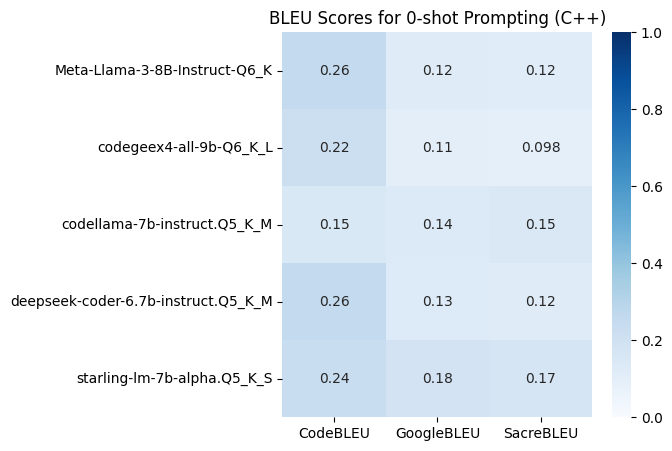

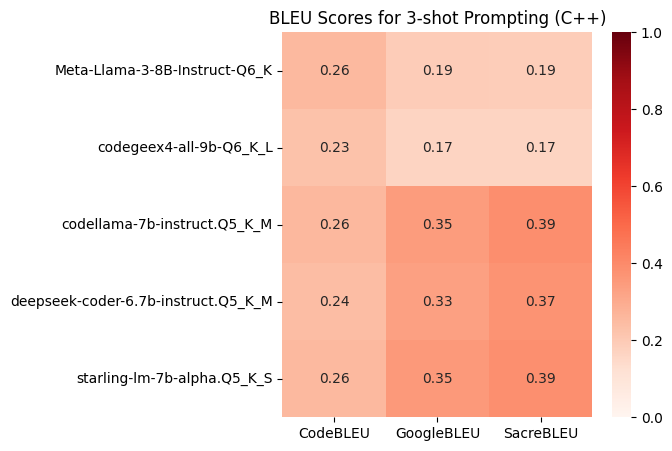

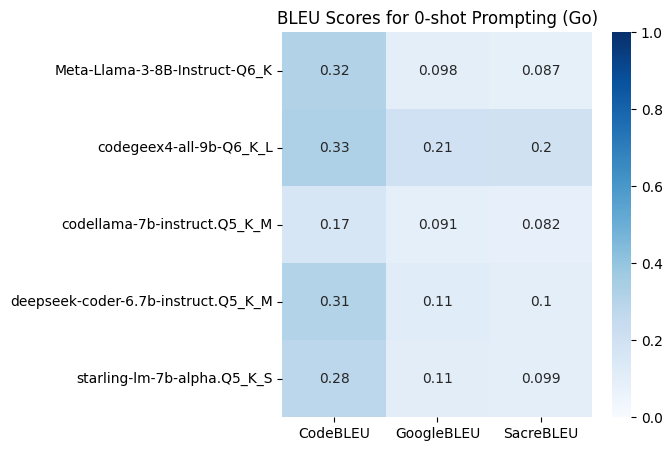

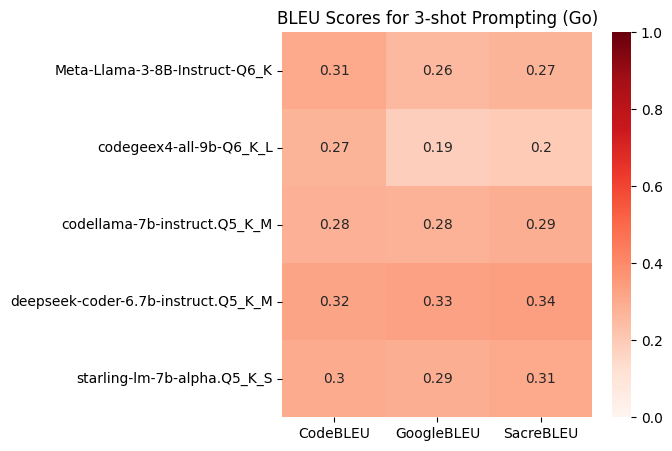

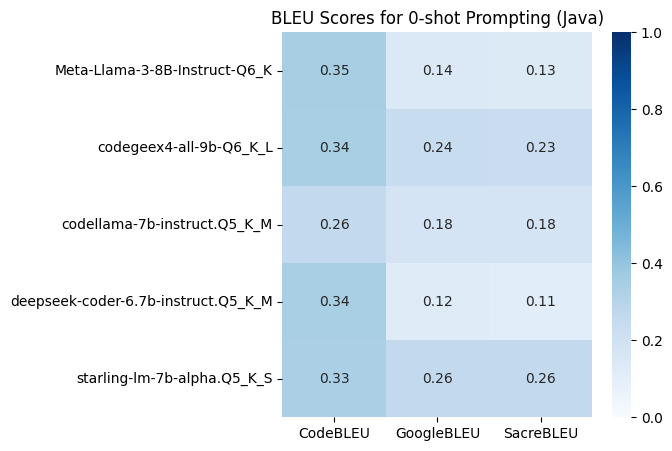

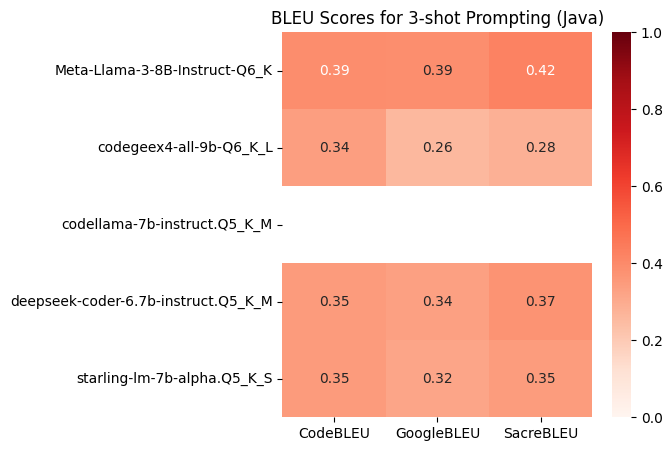

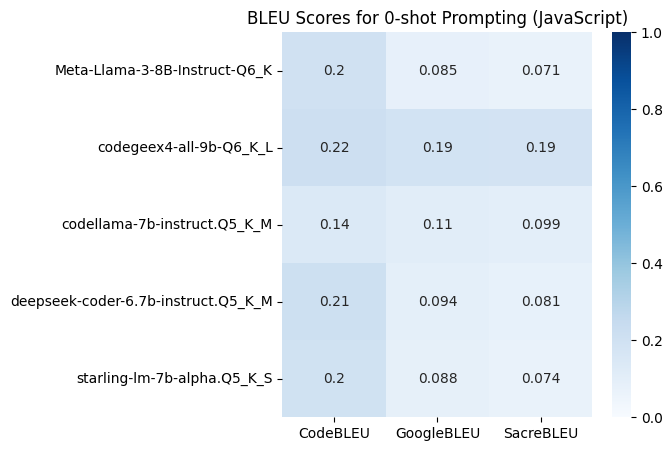

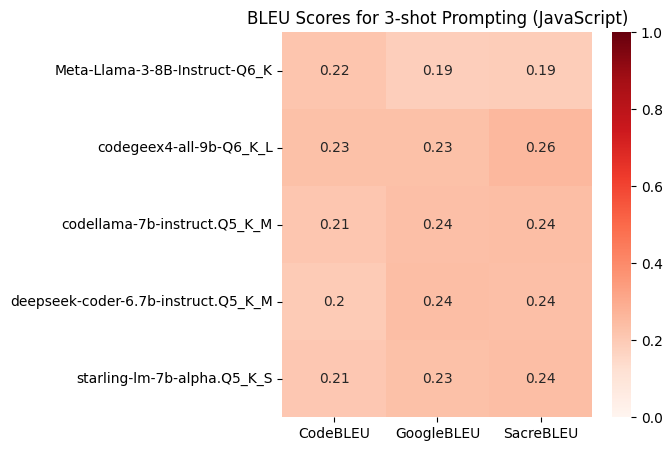

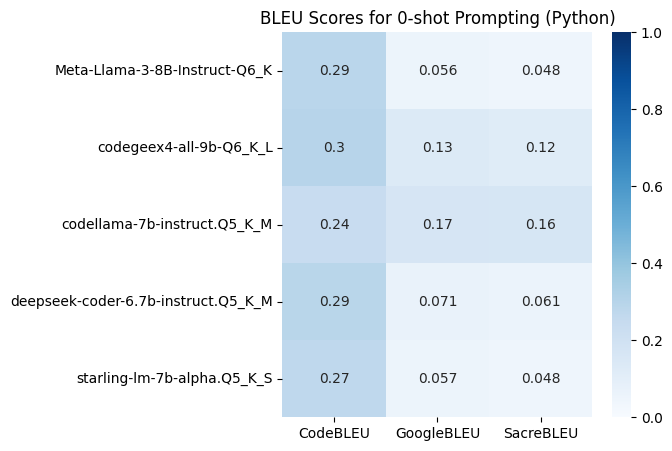

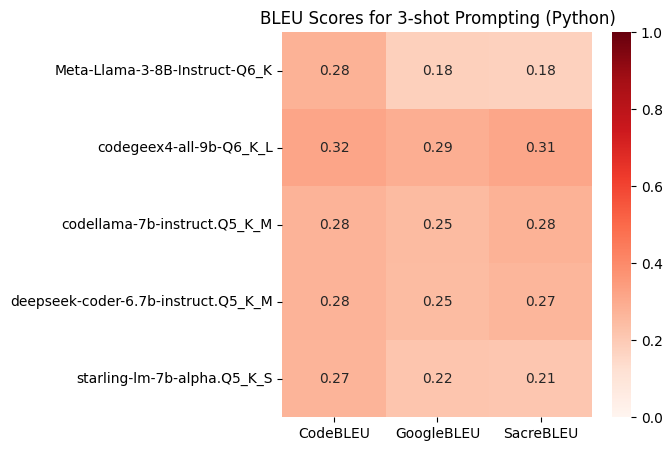

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrames for BLEU scores (CodeBLEU, SacreBLEU, GoogleBLEU) for heatmaps, including 'Programming Language'
df_bleu_melted_0 = df_0_averages.melt(id_vars=['LLM', 'Programming Language'], 
                                      value_vars=['CodeBLEU', 'SacreBLEU', 'GoogleBLEU'], 
                                      var_name='Metric', value_name='Score')
df_bleu_melted_3 = df_3_averages.melt(id_vars=['LLM', 'Programming Language'], 
                                      value_vars=['CodeBLEU', 'SacreBLEU', 'GoogleBLEU'], 
                                      var_name='Metric', value_name='Score')

# Add a column to indicate the shot type
df_bleu_melted_0['Shot'] = '0-shot'
df_bleu_melted_3['Shot'] = '3-shot'

# Combine melted DataFrames for heatmaps
df_bleu_combined = pd.concat([df_bleu_melted_0, df_bleu_melted_3], ignore_index=True)

# Group by LLM, Programming Language, and Metric to resolve duplicate entries by averaging them
df_bleu_combined = df_bleu_combined.groupby(['LLM', 'Programming Language', 'Metric', 'Shot']).mean().reset_index()

# Get the unique programming languages in the data
programming_languages = df_bleu_combined['Programming Language'].unique()

height = 5
width = 5

# Loop through each programming language and create a heatmap for both 0-shot and 3-shot BLEU scores
for language in programming_languages:
    # Filter data for the specific programming language
    heatmap_data_0 = df_bleu_combined[(df_bleu_combined['Shot'] == '0-shot') & (df_bleu_combined['Programming Language'] == language)].pivot("LLM", "Metric", "Score")
    heatmap_data_3 = df_bleu_combined[(df_bleu_combined['Shot'] == '3-shot') & (df_bleu_combined['Programming Language'] == language)].pivot("LLM", "Metric", "Score")

    # Create heatmap for 0-shot BLEU scores for the current programming language
    plt.figure(figsize=(width, height))
    sns.heatmap(heatmap_data_0, annot=True, cmap='Blues', vmin=0, vmax=1).set(xlabel=None, ylabel=None)
    plt.title(f"BLEU Scores for 0-shot Prompting ({language})")
    plt.show()

    # Create heatmap for 3-shot BLEU scores for the current programming language
    plt.figure(figsize=(width, height))
    sns.heatmap(heatmap_data_3, annot=True, cmap='Reds', vmin=0, vmax=1).set(xlabel=None, ylabel=None)
    plt.title(f"BLEU Scores for 3-shot Prompting ({language})")
    plt.show()


### LLM Ranking

##### LLMs Gain Ranking

In [43]:
import pandas as pd

# Calculate the difference for CPU Energy and Execution Time
df_merged = pd.merge(df_0_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     df_3_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     on=['LLM', 'Programming Language'],
                     suffixes=('_0', '_3'))

# Calculate the real differences
df_merged['CPU Energy Difference (J)'] = df_merged['CPU Energy (J)_3'] - df_merged['CPU Energy (J)_0']
df_merged['Execution Time Difference (s)'] = df_merged['Execution time (s)_3'] - df_merged['Execution time (s)_0']

# Calculate the percentage difference
df_merged['CPU Energy Percentage Difference (%)'] = ((df_merged['CPU Energy Difference (J)']) / df_merged['CPU Energy (J)_0']) * 100
df_merged['Execution Time Percentage Difference (%)'] = ((df_merged['Execution Time Difference (s)']) / df_merged['Execution time (s)_0']) * 100

# Select relevant columns for the final table
df_table = df_merged[['LLM', 'Programming Language', 
                      'CPU Energy Difference (J)', 'CPU Energy Percentage Difference (%)',
                      'Execution Time Difference (s)', 'Execution Time Percentage Difference (%)']]

# Display the table
df_table

,LLM,Programming Language,CPU Energy Difference (J),CPU Energy Percentage Difference (%),Execution Time Difference (s),Execution Time Percentage Difference (%)
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,-2291.853370,-48.571382,-35.355019,-48.831702
1,Meta-Llama-3-8B-Instruct-Q6_K,Go,-3447.819248,-73.341334,-52.875784,-73.563214
2,Meta-Llama-3-8B-Instruct-Q6_K,Java,-2743.224870,-70.173710,-42.415579,-70.745598
3,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,-2596.889859,-67.265570,-40.145752,-67.871597
4,Meta-Llama-3-8B-Instruct-Q6_K,Python,-3905.863045,-78.387588,-60.483101,-79.128415
5,codegeex4-all-9b-Q6_K_L,C++,-2718.567874,-43.643112,-41.928754,-43.812637
6,codegeex4-all-9b-Q6_K_L,Go,-244.430528,-9.590544,-3.918215,-10.049812
7,codegeex4-all-9b-Q6_K_L,Java,-662.921918,-25.560348,-10.018919,-25.394454
8,codegeex4-all-9b-Q6_K_L,JavaScript,-611.572397,-31.276799,-9.510657,-31.814960
9,codegeex4-all-9b-Q6_K_L,Python,-1511.394661,-61.537708,-23.197691,-61.827651


In [44]:
import pandas as pd

# Supondo que df_combined_mbpp já esteja carregado com as colunas corretas

# Calcular a média para cada LLM nas colunas de interesse
df_mean_metrics = df_table.groupby('LLM').agg({
    'CPU Energy Difference (J)': 'mean',
    'CPU Energy Percentage Difference (%)': 'mean',
    'Execution Time Difference (s)': 'mean',
    'Execution Time Percentage Difference (%)': 'mean'
}).reset_index()

# Normalizar as colunas de "CPU Energy Difference (J)" e "Execution Time Difference (s)"
# O menor valor começa em 1 e os valores aumentam à medida que os valores aumentam
df_mean_metrics['Energy'] = ((df_mean_metrics['CPU Energy Difference (J)'] - df_mean_metrics['CPU Energy Difference (J)'].min()) /
                             (df_mean_metrics['CPU Energy Difference (J)'].max() - df_mean_metrics['CPU Energy Difference (J)'].min())) + 1

df_mean_metrics['Time'] = ((df_mean_metrics['Execution Time Difference (s)'] - df_mean_metrics['Execution Time Difference (s)'].min()) /
                           (df_mean_metrics['Execution Time Difference (s)'].max() - df_mean_metrics['Execution Time Difference (s)'].min())) + 1

# Ordenar o DataFrame pela coluna 'CPU Energy Difference (J)' em ordem crescente para o ranking de consumo de energia
df_ranked = df_mean_metrics.sort_values(by='CPU Energy Difference (J)')


# Rank the models based on Energy differences, converting to integer
df_ranked['Rank'] = df_mean_metrics['CPU Energy Difference (J)'].rank(ascending=True, method='min').astype(int)

# Reorganizar as colunas para melhor visualização
df_ranked = df_ranked[['Rank', 'LLM', 'Energy', 'Time',
                       'CPU Energy Difference (J)', 'CPU Energy Percentage Difference (%)', 
                       'Execution Time Difference (s)', 'Execution Time Percentage Difference (%)']]

df_ranked.columns = ['Rank', 'LLM', 'Energy', 'Time', 'Energy Difference (J)', 'Energy Difference (%)', 'Time Difference (s)', 'Time Difference (%)']

# Exibir o ranking
df_ranked.style.hide_index()


/tmp/ipykernel_7001/3741856630.py:36: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df_ranked.style.hide_index()


Rank,LLM,Energy,Time,Energy Difference (J),Energy Difference (%),Time Difference (s),Time Difference (%)
1,starling-lm-7b-alpha.Q5_K_S,1.000000,1.000000,-4254.000760,-77.036756,-65.490509,-77.358735
2,deepseek-coder-6.7b-instruct.Q5_K_M,1.188911,1.190622,-3650.280993,-75.600212,-56.129197,-75.916542
3,Meta-Llama-3-8B-Instruct-Q6_K,1.393290,1.391687,-2997.130078,-67.547917,-46.255047,-68.028105
4,codegeex4-all-9b-Q6_K_L,1.971349,1.972844,-1149.777476,-34.321702,-17.714847,-34.579903
5,codellama-7b-instruct.Q5_K_M,2.000000,2.000000,-1058.214175,-44.541577,-16.381257,-45.219093


##### LLMs 0-shot ranking

In [45]:
import pandas as pd

# Select relevant columns from df_0_averages
df_0_table = df_0_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']]

# Rename the columns to make them clearer
df_0_table = df_0_table.rename(columns={'CPU Energy (J)': 'CPU Energy (J) 0-shot', 
                                        'Execution time (s)': 'Execution Time (s) 0-shot'})

# Display the 0-shot table
df_0_table

,LLM,Programming Language,CPU Energy (J) 0-shot,Execution Time (s) 0-shot
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,4718.526185,72.401776
1,Meta-Llama-3-8B-Instruct-Q6_K,Go,4701.058799,71.878023
2,Meta-Llama-3-8B-Instruct-Q6_K,Java,3909.191751,59.955080
3,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,3860.652437,59.149561
4,Meta-Llama-3-8B-Instruct-Q6_K,Python,4982.757047,76.436640
5,codegeex4-all-9b-Q6_K_L,C++,6229.088051,95.700138
6,codegeex4-all-9b-Q6_K_L,Go,2548.661758,38.987941
7,codegeex4-all-9b-Q6_K_L,Java,2593.555918,39.453178
8,codegeex4-all-9b-Q6_K_L,JavaScript,1955.354792,29.893663
9,codegeex4-all-9b-Q6_K_L,Python,2456.046411,37.519930


In [46]:
import pandas as pd

# Supondo que df_0_table já esteja carregado com as colunas corretas

# Calcular a média para cada LLM nas colunas de interesse
df_mean_metrics = df_0_table.groupby('LLM').agg({
    'CPU Energy (J) 0-shot': 'mean',
    'Execution Time (s) 0-shot': 'mean'
}).reset_index()

# Normalizar as colunas de "CPU Energy (J)" e "Execution Time (s)"
# O menor valor começa em 1 e os valores aumentam à medida que os valores aumentam
df_mean_metrics['Energy'] = ((df_mean_metrics['CPU Energy (J) 0-shot'] - df_mean_metrics['CPU Energy (J) 0-shot'].min()) /
                             (df_mean_metrics['CPU Energy (J) 0-shot'].max() - df_mean_metrics['CPU Energy (J) 0-shot'].min())) + 1

df_mean_metrics['Time'] = ((df_mean_metrics['Execution Time (s) 0-shot'] - df_mean_metrics['Execution Time (s) 0-shot'].min()) /
                           (df_mean_metrics['Execution Time (s) 0-shot'].max() - df_mean_metrics['Execution Time (s) 0-shot'].min())) + 1

# Ordenar o DataFrame pela coluna 'CPU Energy (J)' em ordem crescente para o ranking de consumo de energia
df_ranked = df_mean_metrics.sort_values(by='CPU Energy (J) 0-shot')

# Rank the models based on CPU Energy, converting to integer
df_ranked['Rank'] = df_ranked['CPU Energy (J) 0-shot'].rank(ascending=True, method='min').astype(int)

# Reorganizar as colunas para melhor visualização
df_ranked = df_ranked[['Rank', 'LLM', 'Energy', 'Time', 'CPU Energy (J) 0-shot', 'Execution Time (s) 0-shot']]

# Renomear as colunas para melhor clareza
df_ranked.columns = ['Rank', 'LLM', 'Energy', 'Time', 'Energy (J)', 'Time (s)']

# Exibir o ranking
df_ranked.style.hide_index()


/tmp/ipykernel_7001/2735366726.py:32: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df_ranked.style.hide_index()


Rank,LLM,Energy,Time,Energy (J),Time (s)
1,codellama-7b-instruct.Q5_K_M,1.000000,1.000000,2238.351463,34.085119
2,codegeex4-all-9b-Q6_K_L,1.279543,1.281224,3156.541386,48.310970
3,Meta-Llama-3-8B-Instruct-Q6_K,1.668598,1.669739,4434.437244,67.964216
4,deepseek-coder-6.7b-instruct.Q5_K_M,1.792791,1.791903,4842.364348,74.143963
5,starling-lm-7b-alpha.Q5_K_S,2.000000,2.000000,5522.966726,84.670658


##### LLMs 3-shot ranking

In [47]:
import pandas as pd

# Select relevant columns from df_0_averages
df_3_table = df_3_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']]

# Rename the columns to make them clearer
df_3_table = df_3_table.rename(columns={'CPU Energy (J)': 'CPU Energy (J) 3-shot', 
                                        'Execution time (s)': 'Execution Time (s) 3-shot'})

# Display the 0-shot table
df_3_table

,LLM,Programming Language,CPU Energy (J) 3-shot,Execution Time (s) 3-shot
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,2426.672815,37.046757
1,Meta-Llama-3-8B-Instruct-Q6_K,Go,1253.239550,19.002239
2,Meta-Llama-3-8B-Instruct-Q6_K,Java,1165.966881,17.539500
3,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,1263.762578,19.003809
4,Meta-Llama-3-8B-Instruct-Q6_K,Python,1076.894002,15.953538
5,codegeex4-all-9b-Q6_K_L,C++,3510.520177,53.771384
6,codegeex4-all-9b-Q6_K_L,Go,2304.231230,35.069726
7,codegeex4-all-9b-Q6_K_L,Java,1930.634000,29.434259
8,codegeex4-all-9b-Q6_K_L,JavaScript,1343.782394,20.383006
9,codegeex4-all-9b-Q6_K_L,Python,944.651750,14.322239


In [48]:
import pandas as pd

# Supondo que df_3_table já esteja carregado com as colunas corretas

# Calcular a média para cada LLM nas colunas de interesse
df_mean_metrics = df_3_table.groupby('LLM').agg({
    'CPU Energy (J) 3-shot': 'mean',
    'Execution Time (s) 3-shot': 'mean'
}).reset_index()

# Normalizar as colunas de "CPU Energy (J)" e "Execution Time (s)"
# O menor valor começa em 1 e os valores aumentam à medida que os valores aumentam
df_mean_metrics['Energy'] = ((df_mean_metrics['CPU Energy (J) 3-shot'] - df_mean_metrics['CPU Energy (J) 3-shot'].min()) /
                             (df_mean_metrics['CPU Energy (J) 3-shot'].max() - df_mean_metrics['CPU Energy (J) 3-shot'].min())) + 1

df_mean_metrics['Time'] = ((df_mean_metrics['Execution Time (s) 3-shot'] - df_mean_metrics['Execution Time (s) 3-shot'].min()) /
                           (df_mean_metrics['Execution Time (s) 3-shot'].max() - df_mean_metrics['Execution Time (s) 3-shot'].min())) + 1

# Ordenar o DataFrame pela coluna 'CPU Energy (J)' em ordem crescente para o ranking de consumo de energia
df_ranked = df_mean_metrics.sort_values(by='CPU Energy (J) 3-shot')

# Rank the models based on CPU Energy, converting to integer
df_ranked['Rank'] = df_ranked['CPU Energy (J) 3-shot'].rank(ascending=True, method='min').astype(int)

# Reorganizar as colunas para melhor visualização
df_ranked = df_ranked[['Rank', 'LLM', 'Energy', 'Time', 'CPU Energy (J) 3-shot', 'Execution Time (s) 3-shot']]

# Renomear as colunas para melhor clareza
df_ranked.columns = ['Rank', 'LLM', 'Energy', 'Time', 'Energy (J)', 'Time (s)']

# Exibir o ranking
df_ranked.style.hide_index()

/tmp/ipykernel_7001/1239362939.py:32: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df_ranked.style.hide_index()


Rank,LLM,Energy,Time,Energy (J),Time (s)
1,codellama-7b-instruct.Q5_K_M,1.000000,1.000000,1180.137288,17.703863
2,deepseek-coder-6.7b-instruct.Q5_K_M,1.014452,1.024116,1192.083355,18.014766
3,starling-lm-7b-alpha.Q5_K_S,1.107459,1.114509,1268.965966,19.180149
4,Meta-Llama-3-8B-Instruct-Q6_K,1.311108,1.310675,1437.307165,21.709169
5,codegeex4-all-9b-Q6_K_L,2.000000,2.000000,2006.763910,30.596123


### Count number of tokens

In [49]:
import os
import pandas as pd
import re

def count_tokens_in_file(file_path):
    """Count the number of tokens in a text file using plain text splitting."""
    tokens_count = 0
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            # Split the content based on spaces, punctuation, and newlines
            tokens = re.findall(r'\S+', content)
            tokens_count = len(tokens)
    except Exception as e:
        # Log the error but continue processing
        print(f"Error processing {file_path}: {e}")
    
    return tokens_count

def count_tokens_in_directory(base_dir, prompt_type):
    """Traverse the directory and count tokens in all Python files."""
    data = []

    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.py'):  # Ensure we're only processing Python files
                file_path = os.path.join(root, file)
                num_tokens = count_tokens_in_file(file_path)
                
                # Extract the subdirectory structure (after 'base_dir')
                sub_dir = os.path.relpath(root, base_dir)
                data.append({
                    "Subfolder": sub_dir, 
                    "File": file, 
                    "Tokens": num_tokens,
                    "Prompt Type": prompt_type  # Add column for 0-shot or 3-shot
                })

    # Create a DataFrame with the collected data
    df = pd.DataFrame(data)
    return df

# Define the base directories for 0-shot and 3-shot
base_dir0 = "../returned_prompts/Meta-Llama-3-8B-Instruct-Q6_K/humaneval_x/0-shot/python/"
base_dir3 = "../returned_prompts/Meta-Llama-3-8B-Instruct-Q6_K/humaneval_x/3-shot/python/"

# Count tokens and store the result in DataFrames, specifying the prompt type
df_tokens0 = count_tokens_in_directory(base_dir0, '0-shot')
df_tokens3 = count_tokens_in_directory(base_dir3, '3-shot')

# Combine both DataFrames into one
df_tokens_combined = pd.concat([df_tokens0, df_tokens3], ignore_index=True)

# Display the combined DataFrame
df_tokens_combined

""


In [50]:
#NOTE: This code works! :)

want_to_run = False

if want_to_run:
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Select the last 2 subfolders
    df_subset = df_merged[df_merged['Subfolder'].isin(df_merged['Subfolder'].unique()[-2:])]
    
    # Set the width of the bars
    bar_width = 0.35
    
    # Set the positions of the bars
    r1 = np.arange(len(df_subset['File']))
    r2 = [x + bar_width for x in r1]
    
    # Create the grouped bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(r1, df_subset['Tokens_0_shot'], color='lightblue', width=bar_width, label='0-shot Tokens')
    plt.bar(r2, df_subset['Tokens_3_shot'], color='lightgreen', width=bar_width, label='3-shot Tokens')
    
    # Add labels and title
    plt.xlabel('Files', fontweight='bold')
    plt.ylabel('Number of Tokens', fontweight='bold')
    plt.title('Token Counts for Files in the Last Two Subfolders (0-shot vs 3-shot)')
    plt.xticks([r + bar_width / 2 for r in range(len(df_subset['File']))], df_subset['File'], rotation=90)
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    